In [32]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [33]:
data = pd.read_csv('us_covid19_daily.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      320 non-null    int64  
 1   states                    320 non-null    int64  
 2   positive                  320 non-null    int64  
 3   negative                  320 non-null    int64  
 4   pending                   278 non-null    float64
 5   hospitalizedCurrently     265 non-null    float64
 6   hospitalizedCumulative    278 non-null    float64
 7   inIcuCurrently            256 non-null    float64
 8   inIcuCumulative           257 non-null    float64
 9   onVentilatorCurrently     257 non-null    float64
 10  onVentilatorCumulative    250 non-null    float64
 11  recovered                 257 non-null    float64
 12  dateChecked               320 non-null    object 
 13  death                     301 non-null    float64
 14  hospitaliz

In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Whole US data

      death  positive
0  273374.0  14534035
1  272236.0  14357264
2  269791.0  14146191
3  267228.0  13921360
4  264522.0  13711156
[[0.02052035]]
[36282.71647573]


Text(0.5, 0, 'Positive Cases (in millions)')

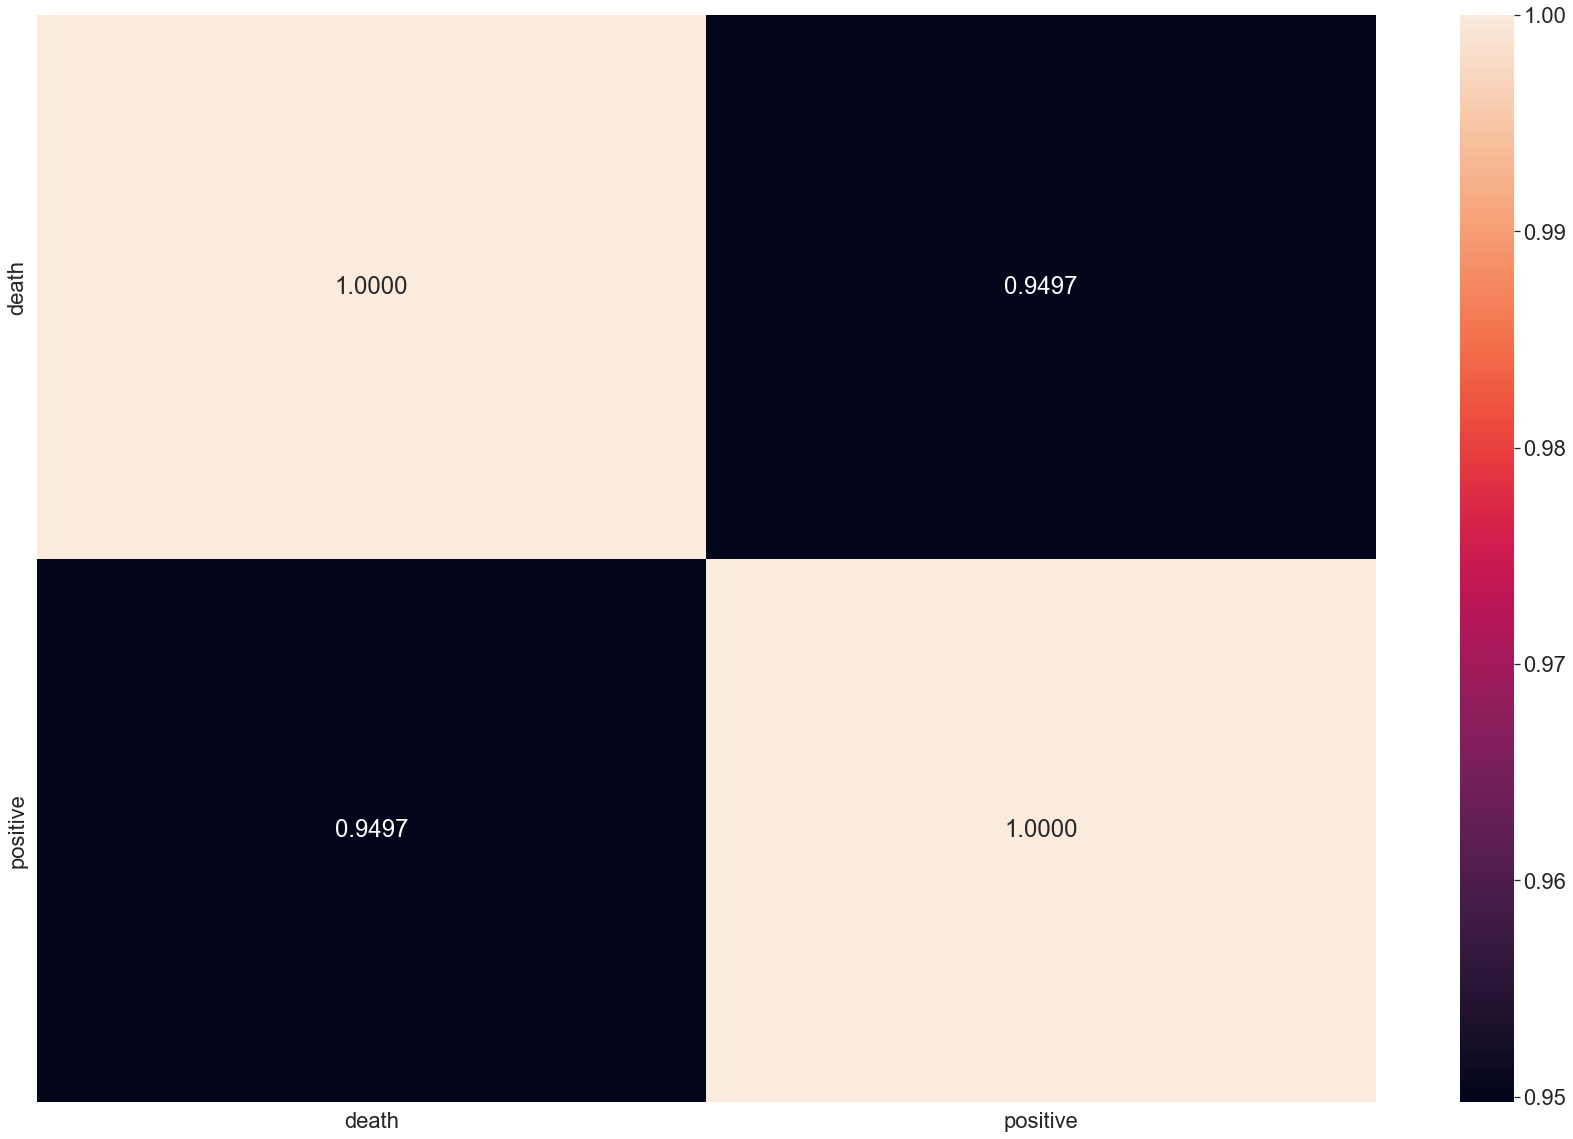

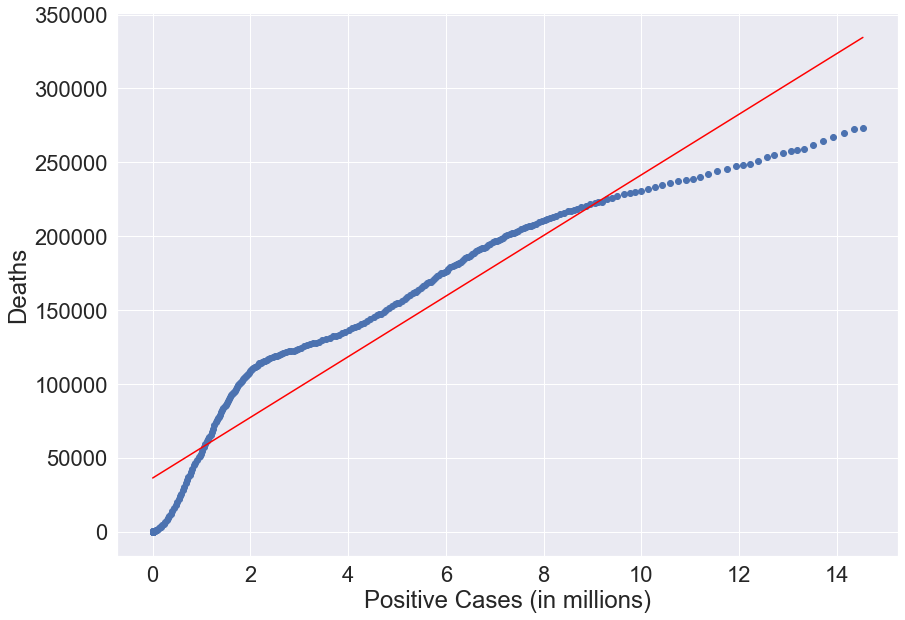

In [35]:
wholeposdeath=data[(data['death']>=0) & (data['positive']>=0)]
wholeposdeath=pd.DataFrame(data[['death','positive']])
print(wholeposdeath.head())
sb.heatmap(wholeposdeath.corr(),annot=True,fmt='0.4f')
wholeposdeath = wholeposdeath.dropna()
wholepos = wholeposdeath[['positive']]
wholedeath=wholeposdeath[['death']]
linreg.fit(wholepos,wholedeath)
regline_x = wholepos
regline_y = linreg.intercept_ + linreg.coef_ * wholepos
print(linreg.coef_)
print(linreg.intercept_)
f,ax=plt.subplots()
ax.scatter(wholepos,wholedeath)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6)))
f.set_size_inches(14,10)
ax.plot(regline_x,regline_y,color='red')
plt.ylabel('Deaths')
plt.xlabel('Positive Cases (in millions)')


              death
count    301.000000
mean   22936.168152
std    11832.466148
min      255.323857
25%    15652.525913
50%    19535.389625
75%    32691.176960
max    61152.195743


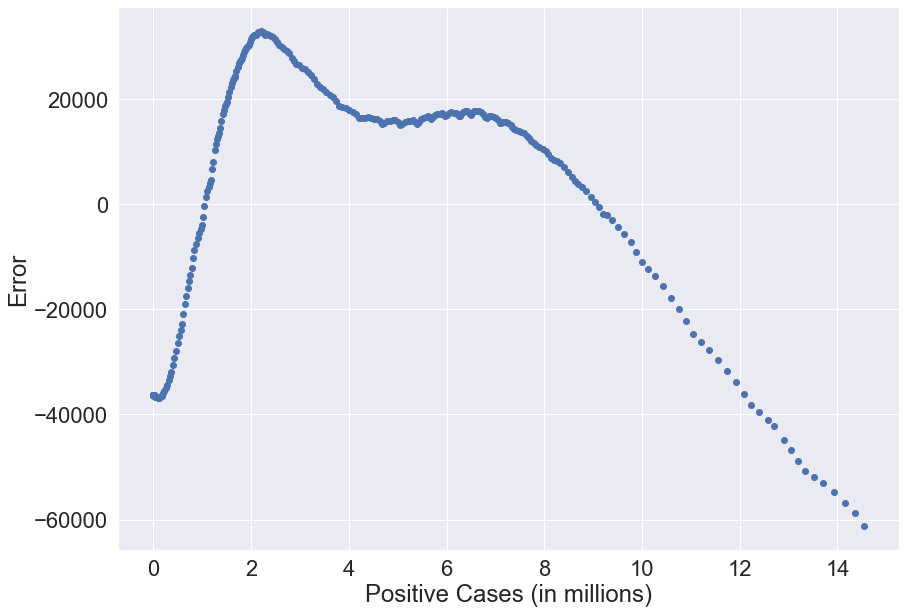

In [36]:
error=wholedeath-linreg.predict(wholepos)
f,ax=plt.subplots()
ax.scatter(wholepos,error)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{0:g}'.format(x/1e6)))
f.set_size_inches(14,10)
plt.ylabel('Error')
plt.xlabel('Positive Cases (in millions)')
erroradj=error.abs()
print(erroradj.describe())

[[0.4816166]]
[-414.14772099]
      death  hospitalized
0  273374.0      585676.0
1  272236.0      583420.0
2  269791.0      580104.0
3  267228.0      575452.0
4  264522.0      570121.0


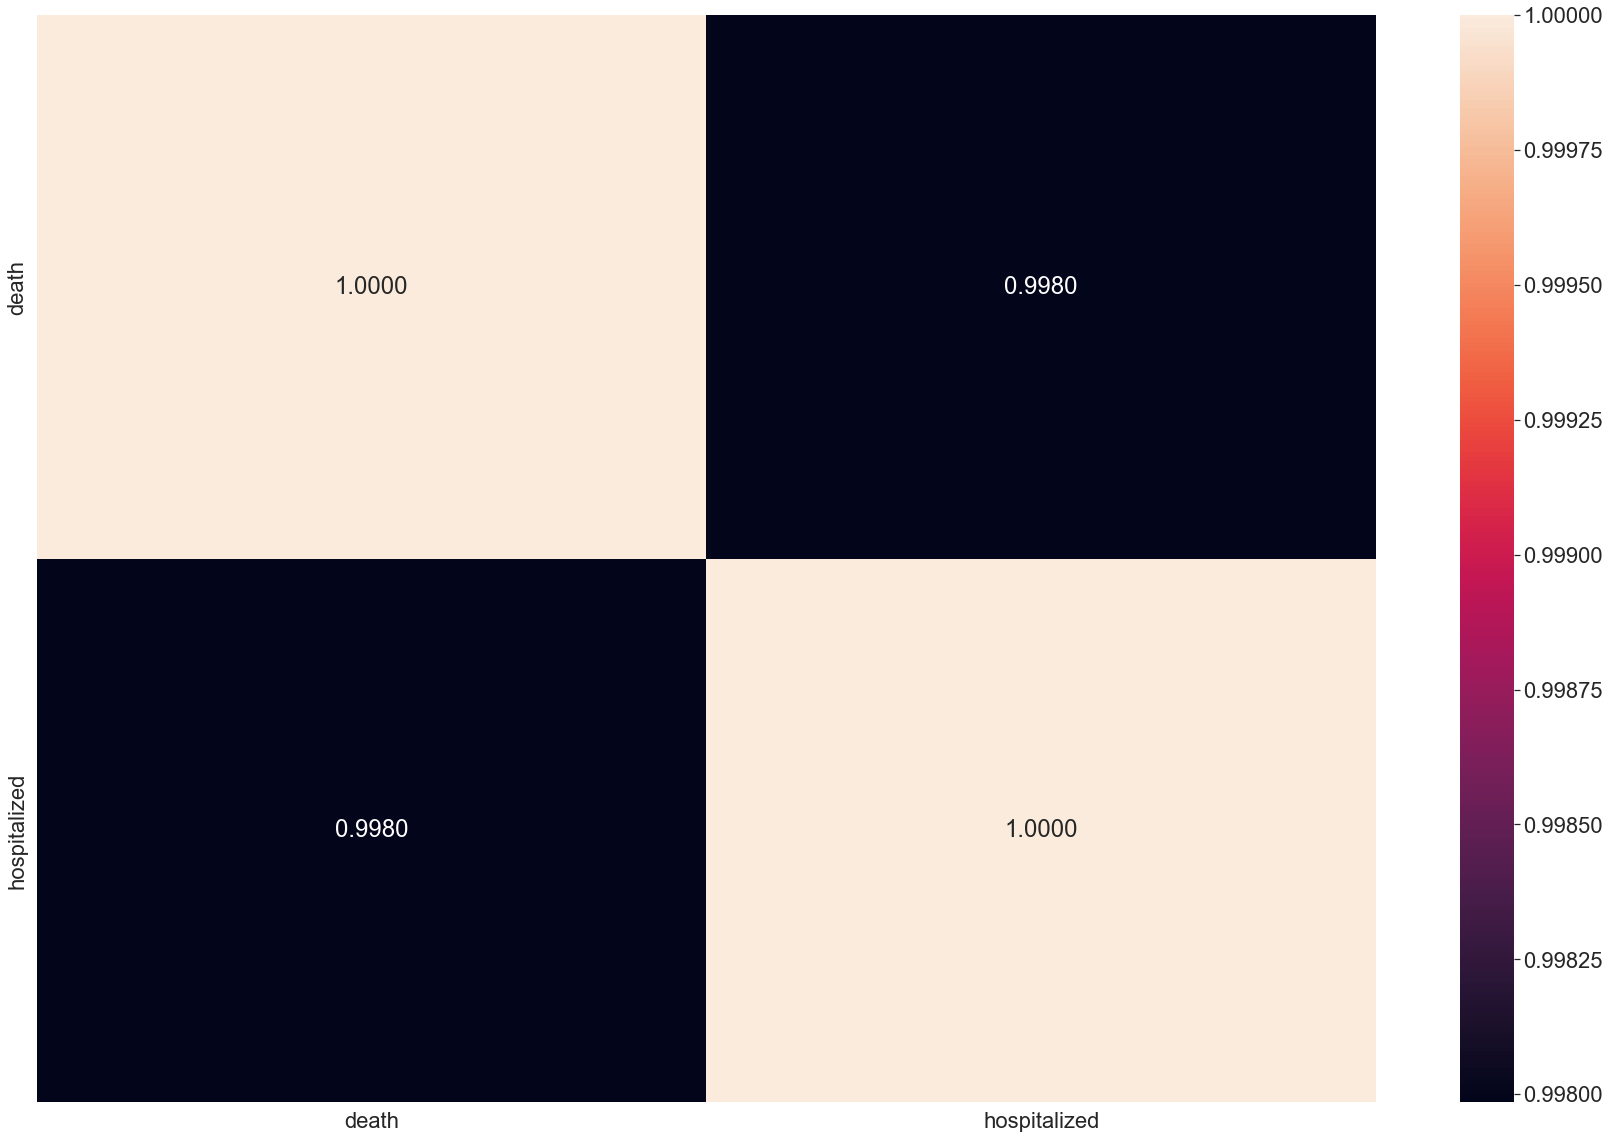

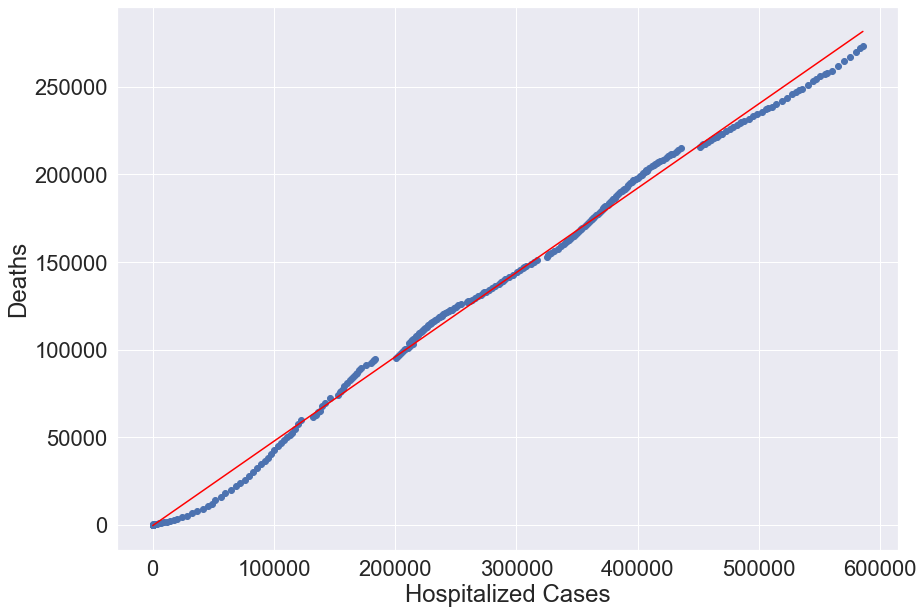

In [37]:

wholedeathhospitalized=data[(data['death']>=0) & (data['hospitalized']>=0)]
wholedeathhospitalized=pd.DataFrame(data[['death','hospitalized']])
wholedeathhospitalized = wholedeathhospitalized.dropna()
sb.heatmap(wholedeathhospitalized.corr(),annot=True,fmt='0.4f')
wholedeath = wholedeathhospitalized[['death']]
wholehospitalized=wholedeathhospitalized[['hospitalized']]
linreg.fit(wholehospitalized,wholedeath)
regline_x = wholehospitalized
regline_y = linreg.intercept_ + linreg.coef_ * wholehospitalized
print(linreg.coef_)
print(linreg.intercept_)
f,ax=plt.subplots()
ax.scatter(wholehospitalized,wholedeath)
f.set_size_inches(14,10)
ax.plot(regline_x,regline_y,color='red')
plt.ylabel('Deaths')
plt.xlabel('Hospitalized Cases')
print(wholedeathhospitalized.head())

              death
count    278.000000
mean    3967.585926
std     2909.289552
min        4.027230
25%     1273.183970
50%     3624.108551
75%     6022.411361
max    11071.496200


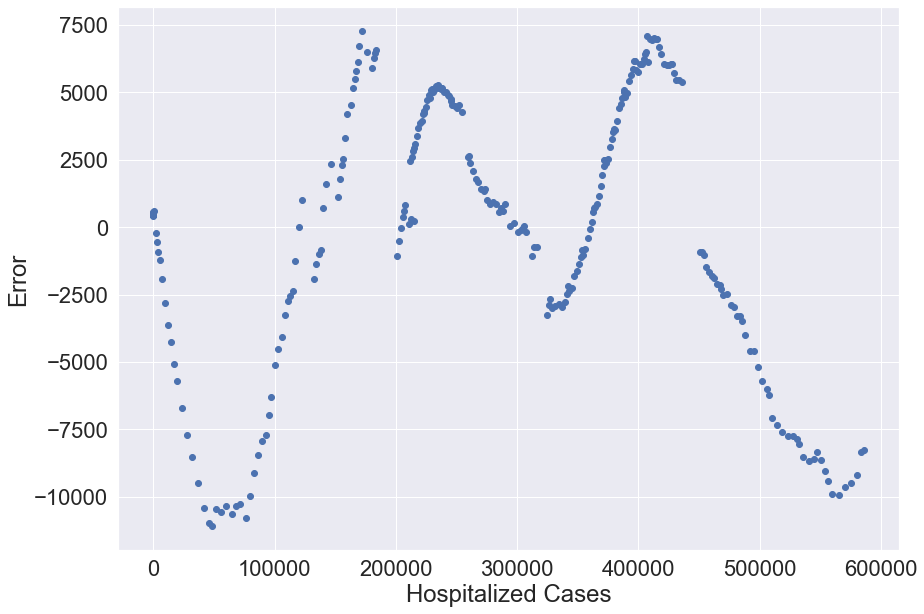

In [38]:
error=wholedeath-linreg.predict(wholehospitalized)
f,ax=plt.subplots()
ax.scatter(wholehospitalized,error)
f.set_size_inches(14,10)
plt.ylabel('Error')
plt.xlabel('Hospitalized Cases')
erroradj=error.abs()
print(erroradj.describe())


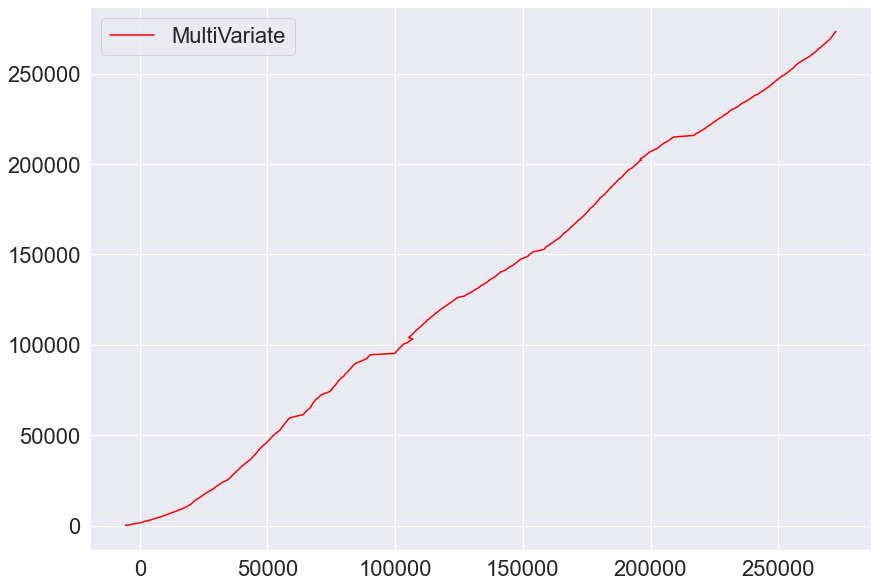

In [39]:
f,ax=plt.subplots()
f.set_size_inches(14,10)
multi=data[(data['death']>=0) & (data['positive']>=0) & (data['hospitalized']>=0)]
multi=pd.DataFrame(data[['death','positive','hospitalized']])
multi = multi.dropna()
#sb.heatmap(multi.corr(),annot=True,fmt='0.4f')
predictors=multi[['positive','hospitalized']]
target=multi[['death']]
linreg.fit(predictors,target)
regline_x = linreg.intercept_ + (linreg.coef_[0][0]* predictors['positive']) + (linreg.coef_[0][1]* predictors['hospitalized'])
regline_y = target
ax.plot(regline_x,regline_y,color='red')
ax.legend(['MultiVariate'])

-0.0030233799419104035
0.549814584060474
[-5498.79912884]


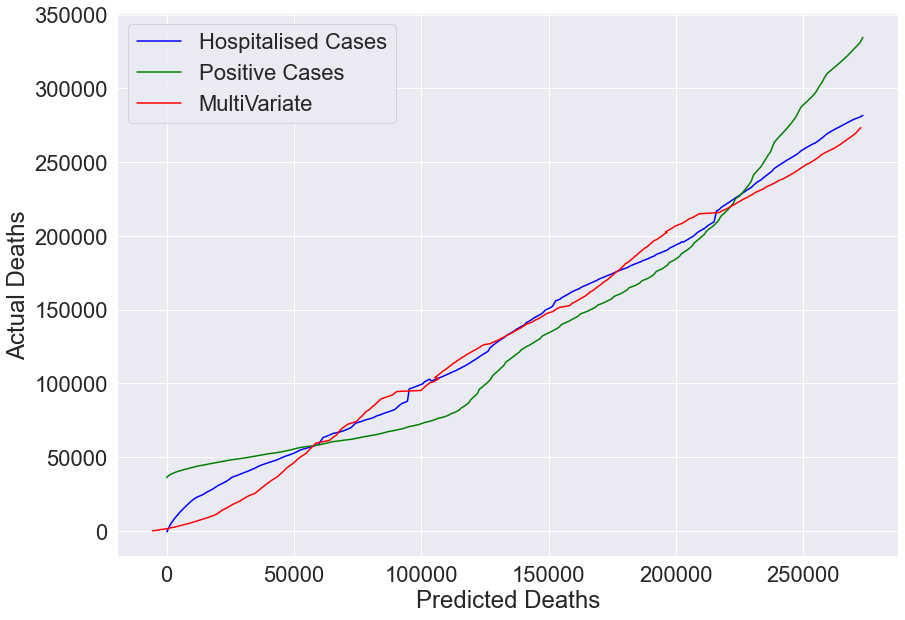

In [40]:
f,ax=plt.subplots()
f.set_size_inches(14,10)

wholedeathhospitalized=data[(data['death']>=0) & (data['hospitalized']>=0)]
wholedeathhospitalized=pd.DataFrame(data[['death','hospitalized']])
wholedeathhospitalized = wholedeathhospitalized.dropna()
wholedeath = wholedeathhospitalized[['death']]
wholehospitalized=wholedeathhospitalized[['hospitalized']]
linreg.fit(wholehospitalized,wholedeath)
regline_x = wholedeath
regline_y = linreg.intercept_ + linreg.coef_ * wholehospitalized
ax.plot(regline_x,regline_y,color='blue')

wholeposdeath=data[(data['death']>=0) & (data['positive']>=0)]
wholeposdeath=pd.DataFrame(data[['death','positive']])
wholeposdeath = wholeposdeath.dropna()
wholepos = wholeposdeath[['positive']]
wholedeath=wholeposdeath[['death']]
linreg.fit(wholepos,wholedeath)
regline_x = wholedeath
regline_y = linreg.intercept_ + linreg.coef_ * wholepos
ax.plot(regline_x,regline_y,color='green')

multi=data[(data['death']>=0) & (data['positive']>=0) & (data['hospitalized']>=0)]
multi=pd.DataFrame(data[['death','positive','hospitalized']])
multi = multi.dropna()
#sb.heatmap(multi.corr(),annot=True,fmt='0.4f')
predictors=multi[['positive','hospitalized']]
target=multi[['death']]
concat=pd.concat([predictors,target],axis=1)

linreg.fit(predictors,target)
regline_x = linreg.intercept_ + (linreg.coef_[0][0]* predictors['positive']) + (linreg.coef_[0][1]* predictors['hospitalized'])
regline_y = target

print(linreg.coef_[0][0])
print(linreg.coef_[0][1])
print(linreg.intercept_)

ax.plot(regline_x,regline_y,color='red')
plt.ylabel('Actual Deaths')
plt.xlabel('Predicted Deaths')
# ax.legend(['MultiVariate'])
ax.legend(['Hospitalised Cases','Positive Cases','MultiVariate'])

<AxesSubplot:>

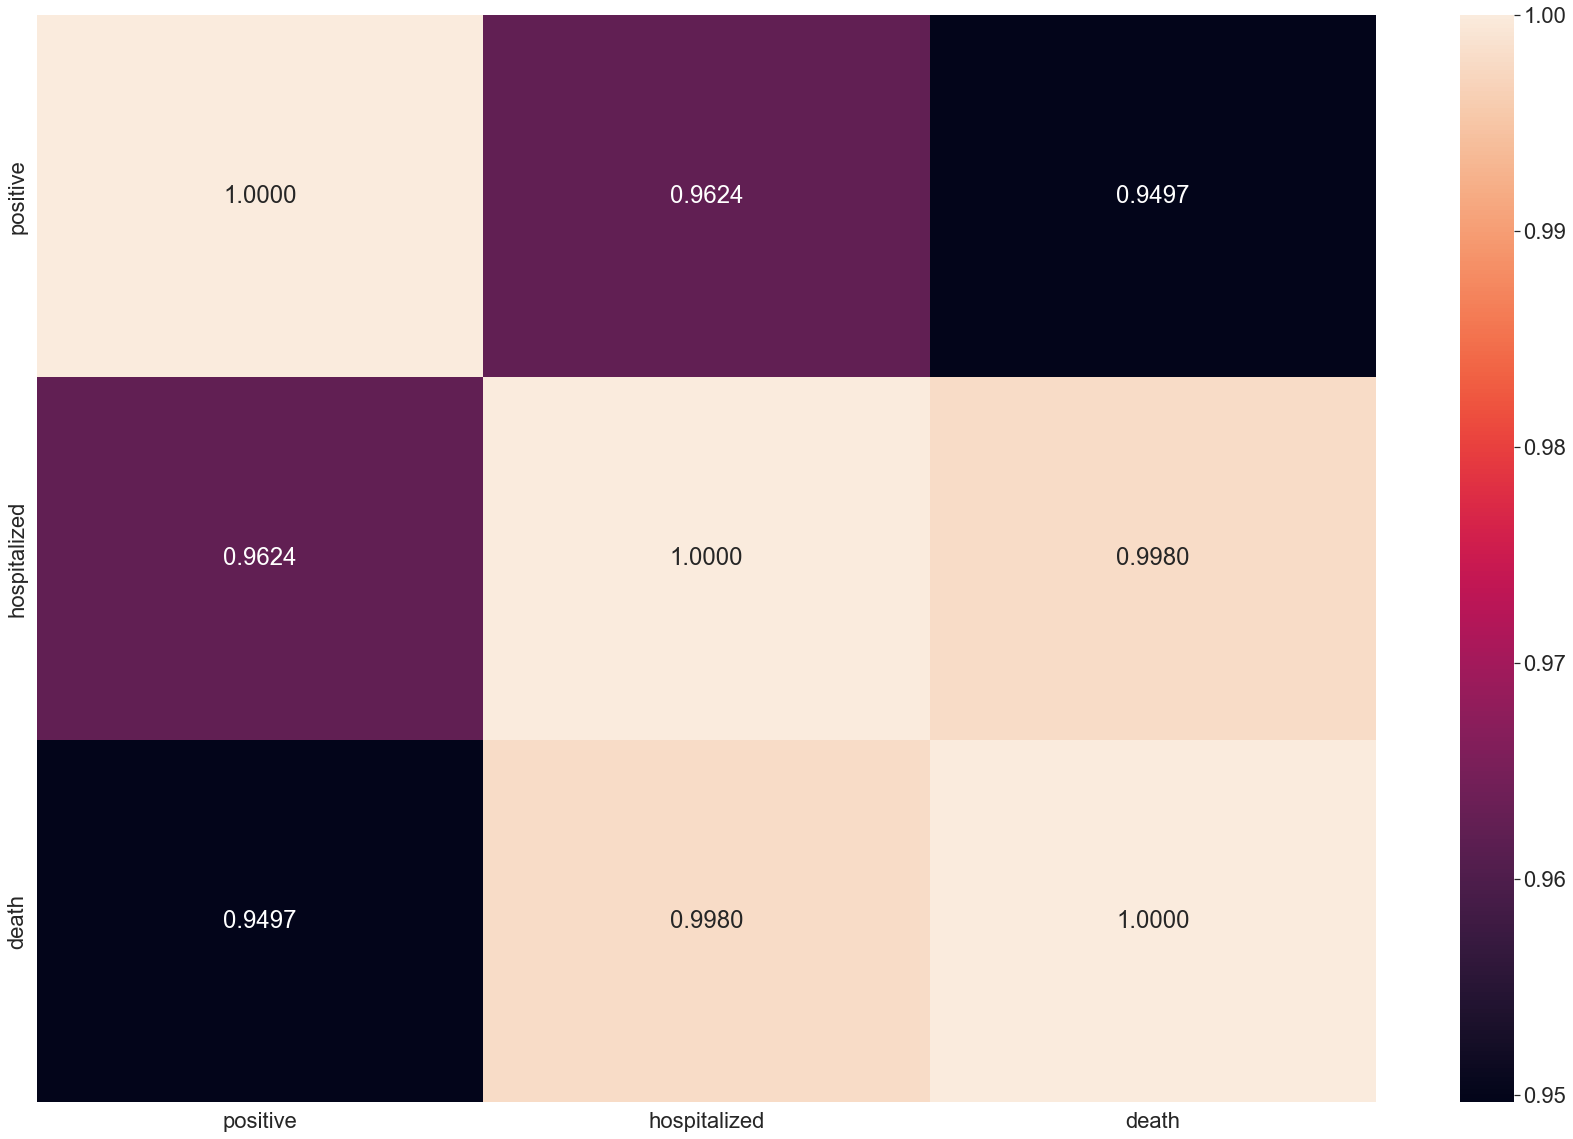

In [41]:
sb.heatmap(concat.corr(),annot=True,fmt='0.4f')

             death
count   278.000000
mean   3159.119711
std    2159.313012
min      16.487495
25%    1471.029974
50%    2643.260863
75%    4975.228876
max    9135.128663


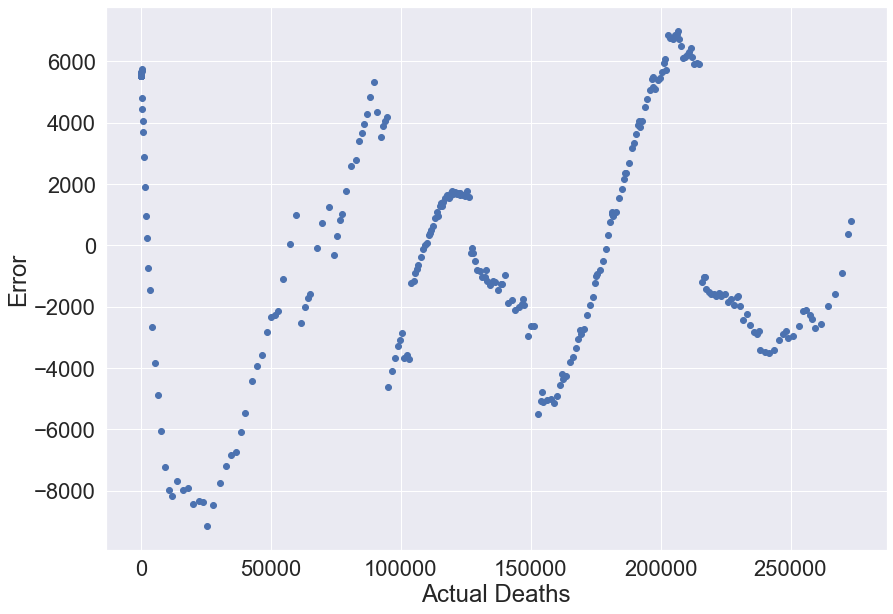

In [42]:
error=target-linreg.predict(predictors)
f,ax=plt.subplots()
ax.scatter(target,error)
f.set_size_inches(14,10)
plt.ylabel('Error')
plt.xlabel('Actual Deaths')
erroradj=error.abs()
print(erroradj.describe())

In [43]:
bystates = pd.read_csv('us_states_covid19_daily.csv')
bystates['date'] = pd.to_datetime(bystates['date'], format='%Y%m%d')
bystates.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-12-06,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,2020-12-06,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,2020-12-06,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,2020-12-06,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,2020-12-06,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


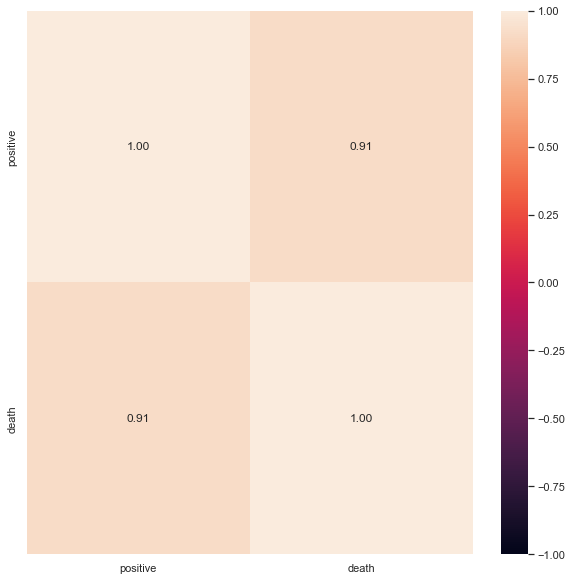

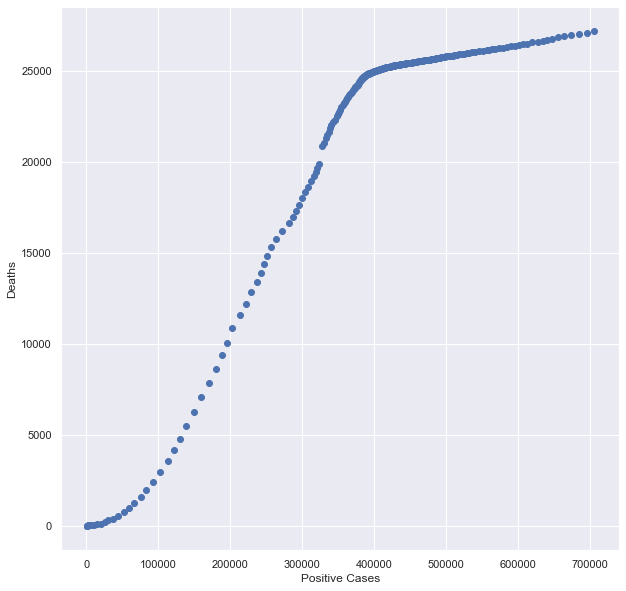

In [44]:
ny = bystates[bystates.state == 'NY']
cleaned = ny[ny.death >= 0]
ny = cleaned[cleaned.positive >= 0]
nydeath = pd.DataFrame(ny['death'])
nypos = pd.DataFrame(ny['positive'])
combined = pd.concat([nypos, nydeath], axis=1)
sb.set(rc={'figure.figsize':(10,10)})
sb.heatmap(combined.corr(), vmin=-1, vmax=1, annot=True,fmt='.2f')
linreg.fit(nypos, nydeath)
regline_x = nypos
regline_y = linreg.intercept_ + linreg.coef_ * nypos

f=plt.figure(figsize=(10,10))
plt.scatter(nypos, nydeath)
#plt.plot(regline_x, regline_y, color='red')
plt.xlabel('Positive Cases')
plt.ylabel('Deaths')
plt.show()

nyposanddate = pd.DataFrame(ny[['positive', 'date']])
nydeathanddate = pd.DataFrame(ny[['death', 'date']])
nyposanddate['Growth Rate'] = nyposanddate['positive'].shift(1)/nyposanddate['positive']
nydeathanddate['Growth Rate'] = nydeathanddate['death'].shift(1)/nydeathanddate['death']



<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

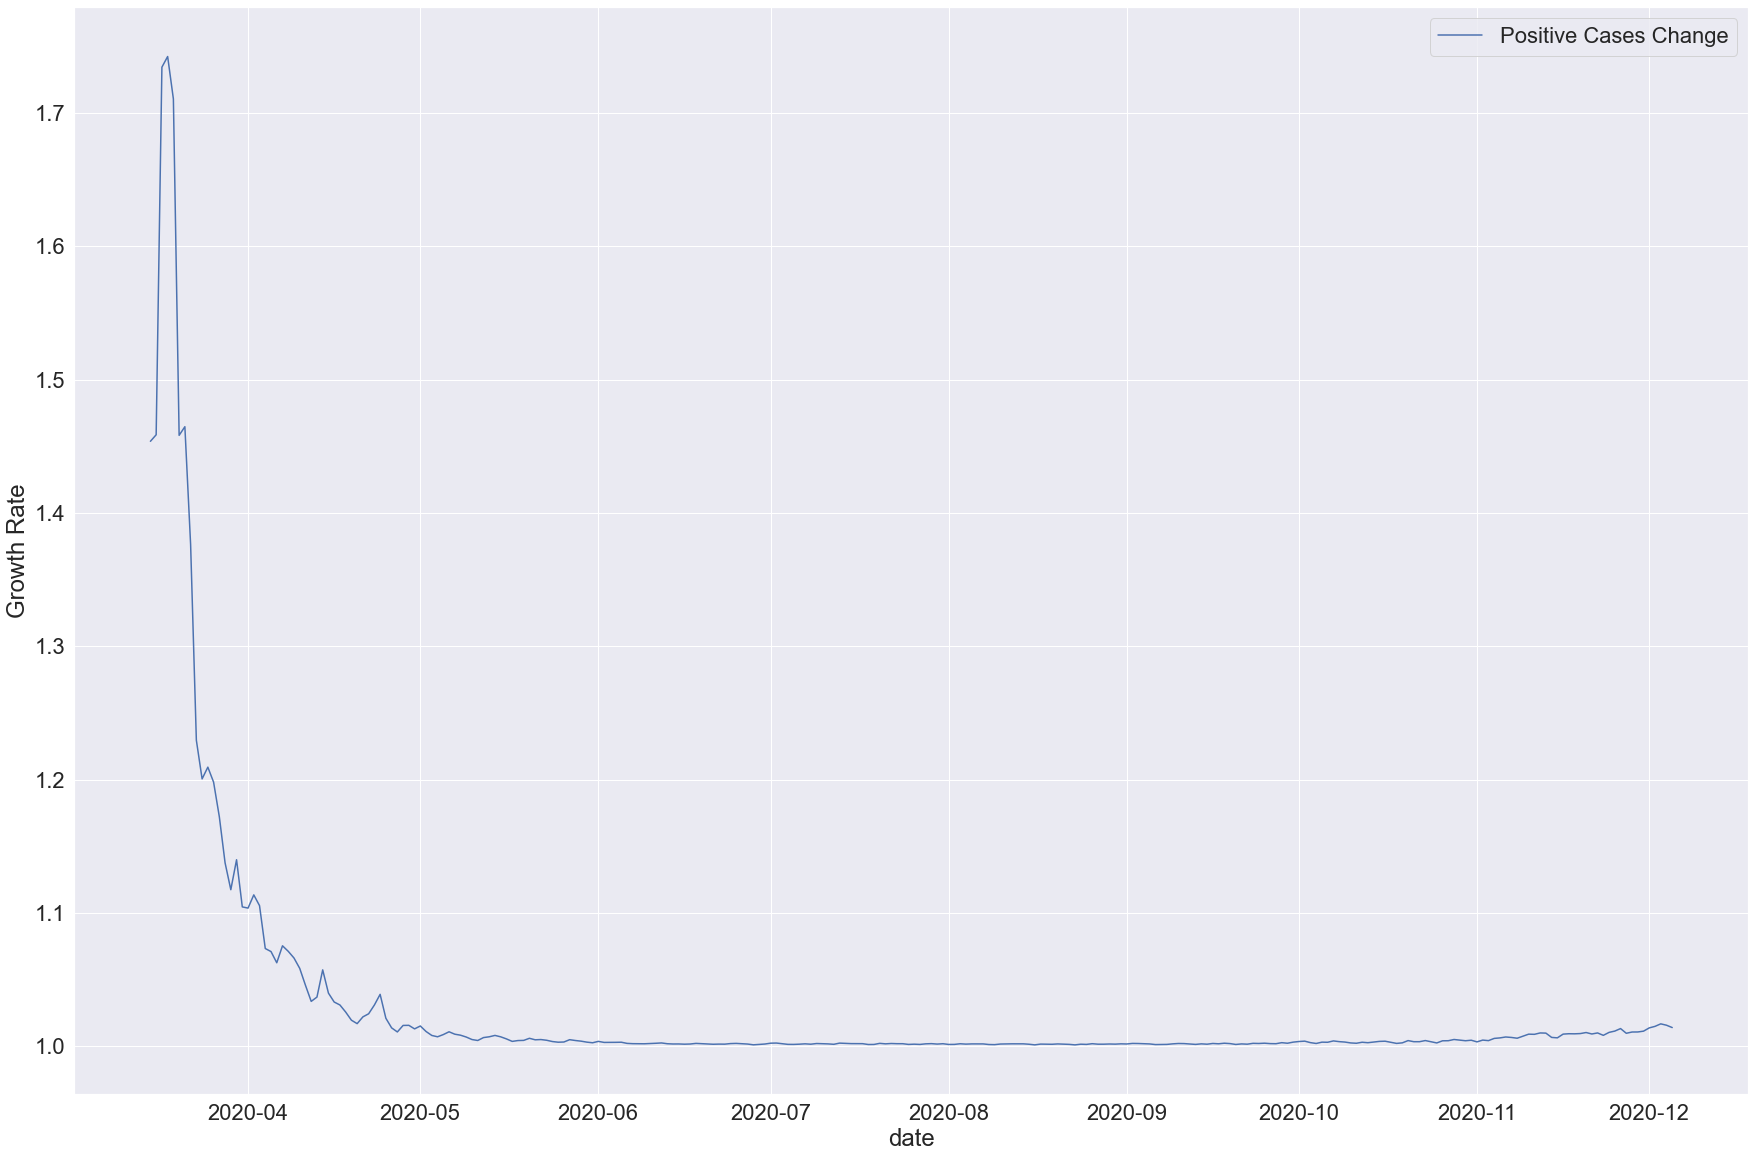

In [45]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(x='date', y='Growth Rate', data=nyposanddate, label='Positive Cases Change')


<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

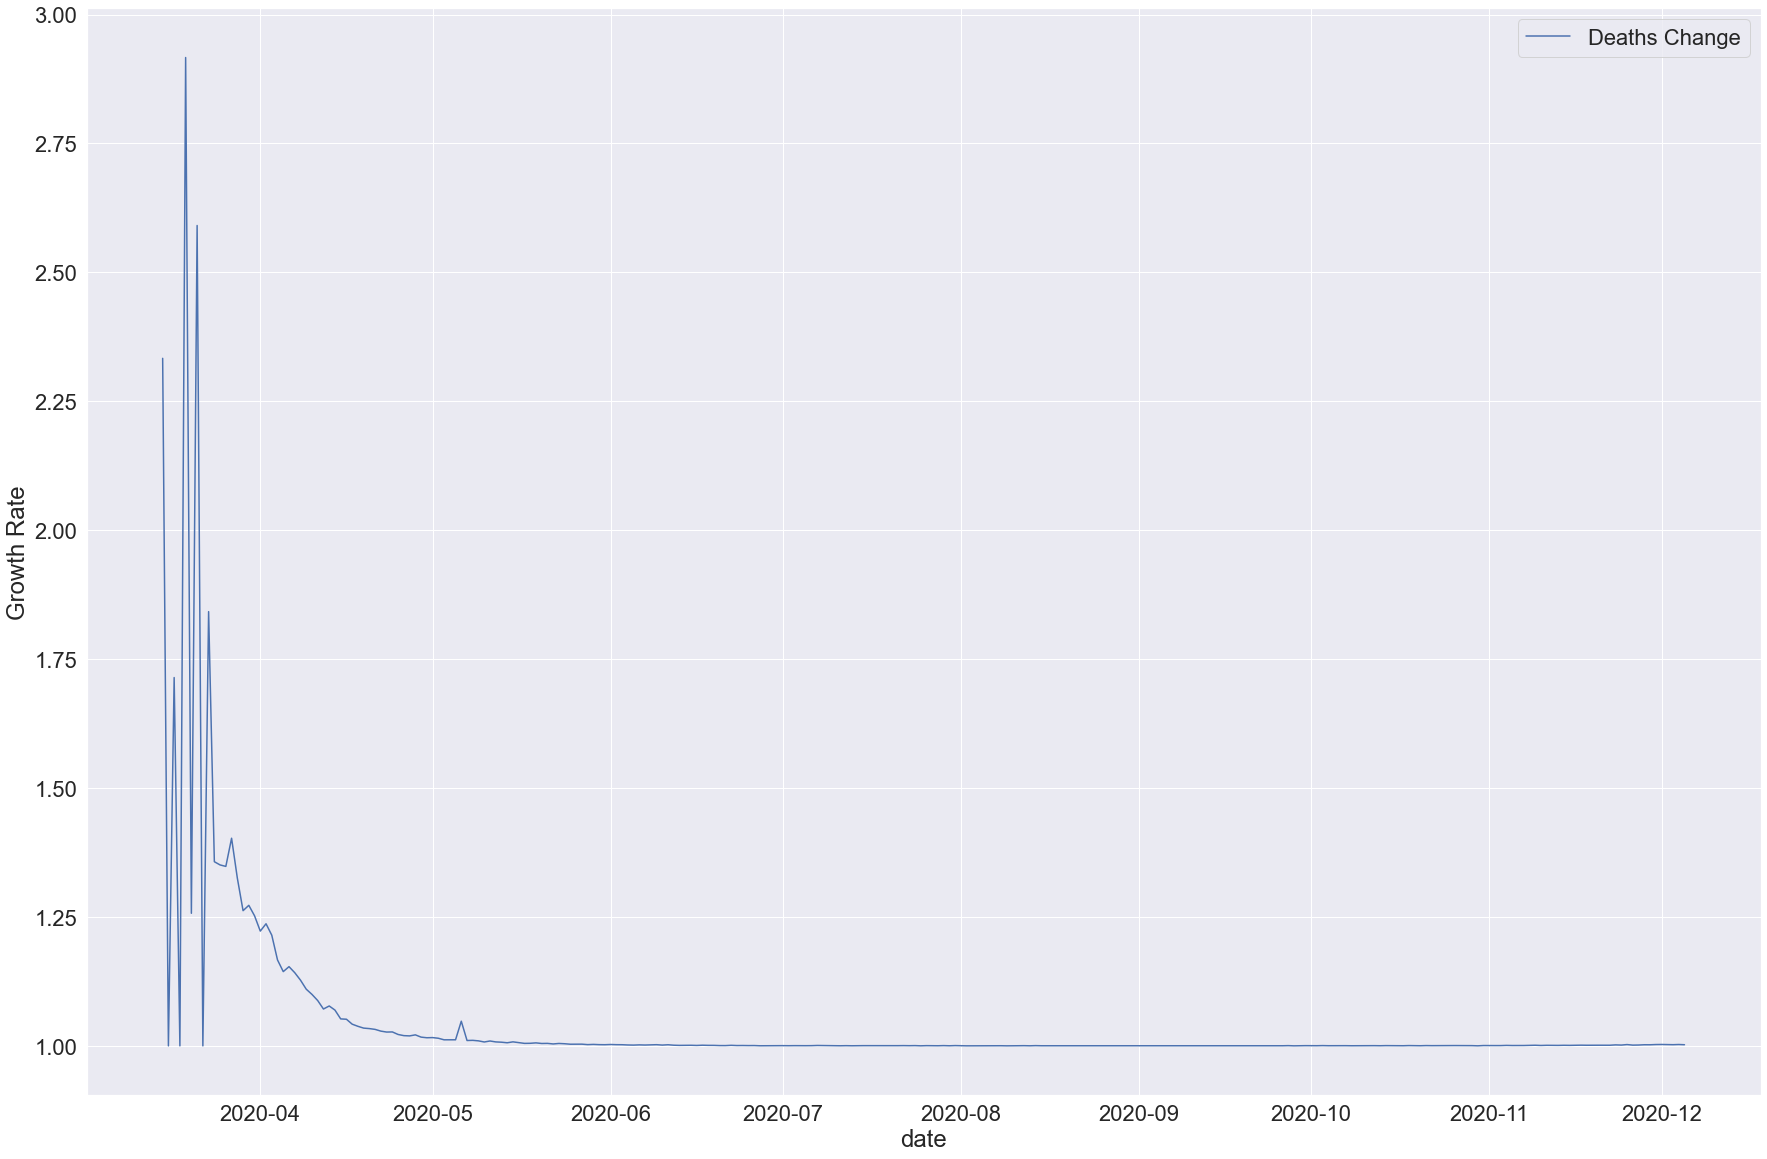

In [46]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(x='date', y='Growth Rate', data=nydeathanddate, label='Deaths Change')

<AxesSubplot:xlabel='date', ylabel='death'>

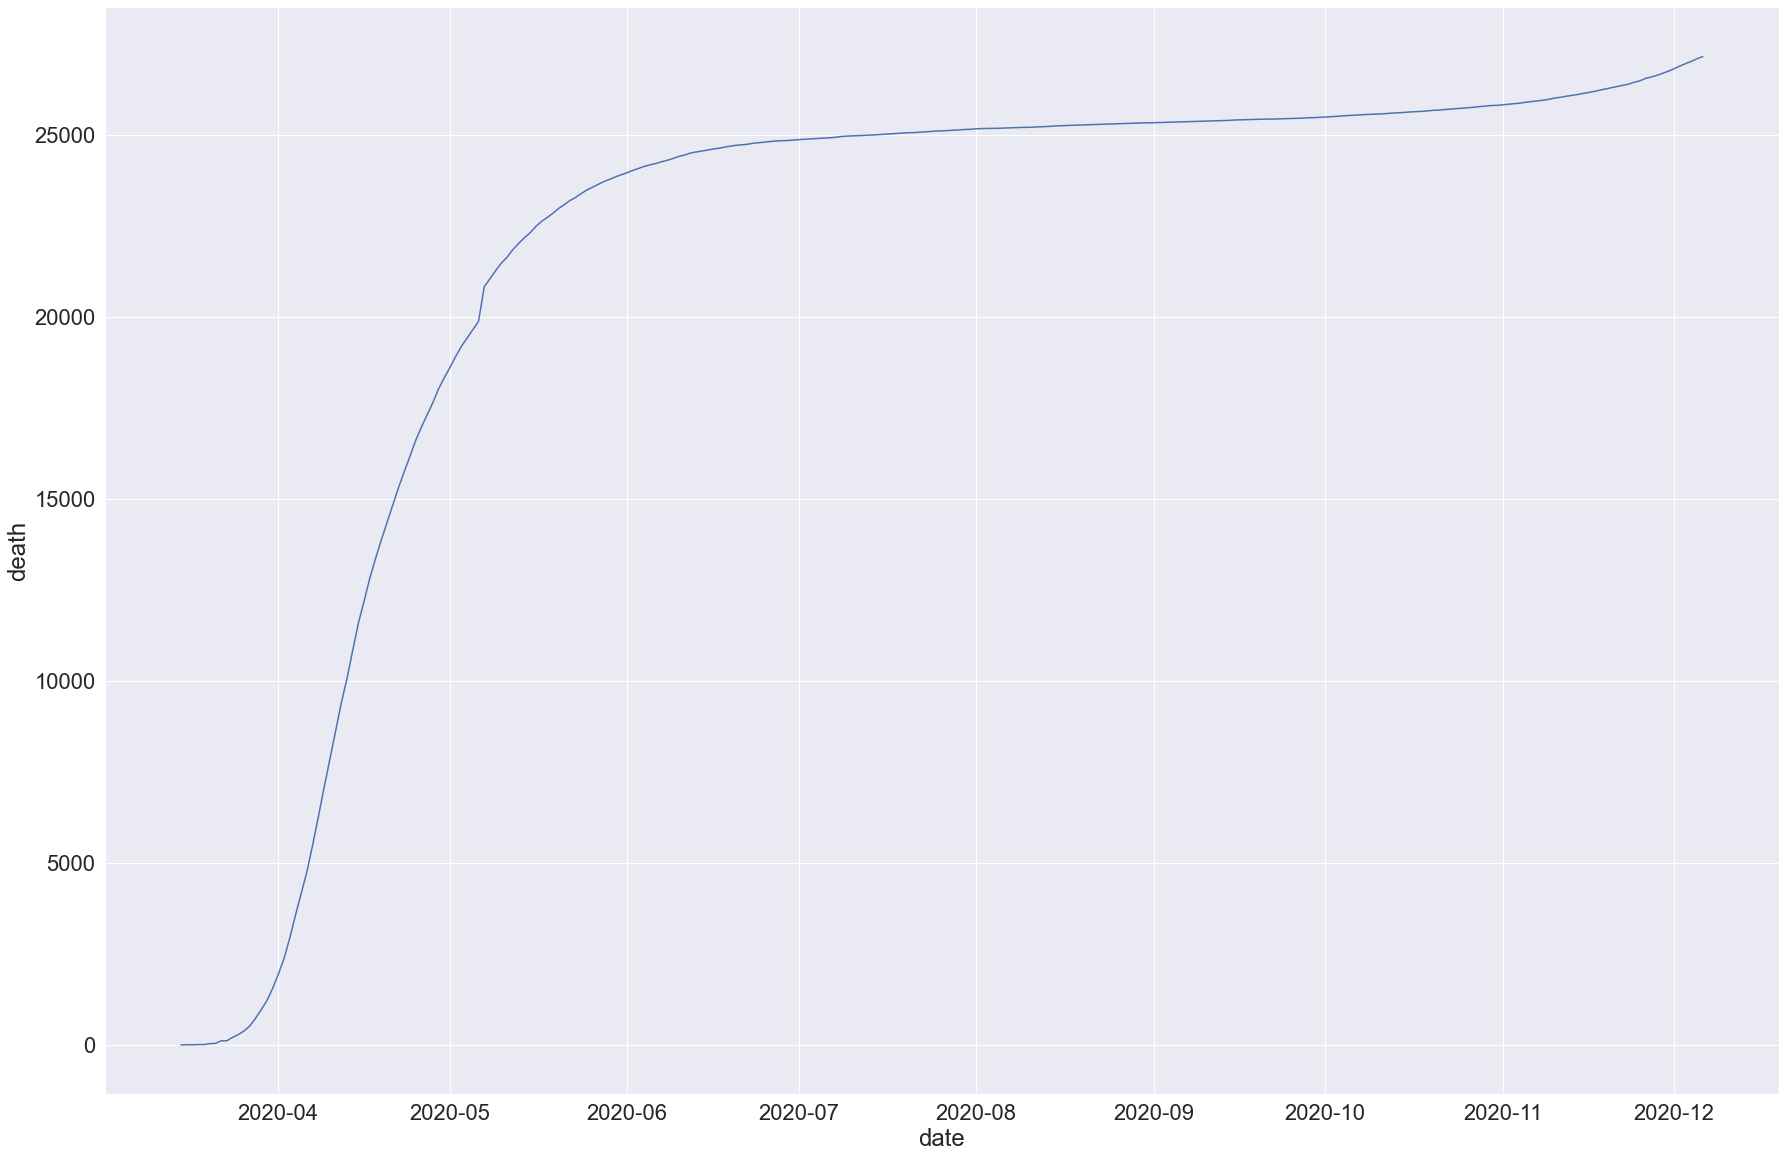

In [47]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=ny,x='date', y='death')

<AxesSubplot:xlabel='date', ylabel='positive'>

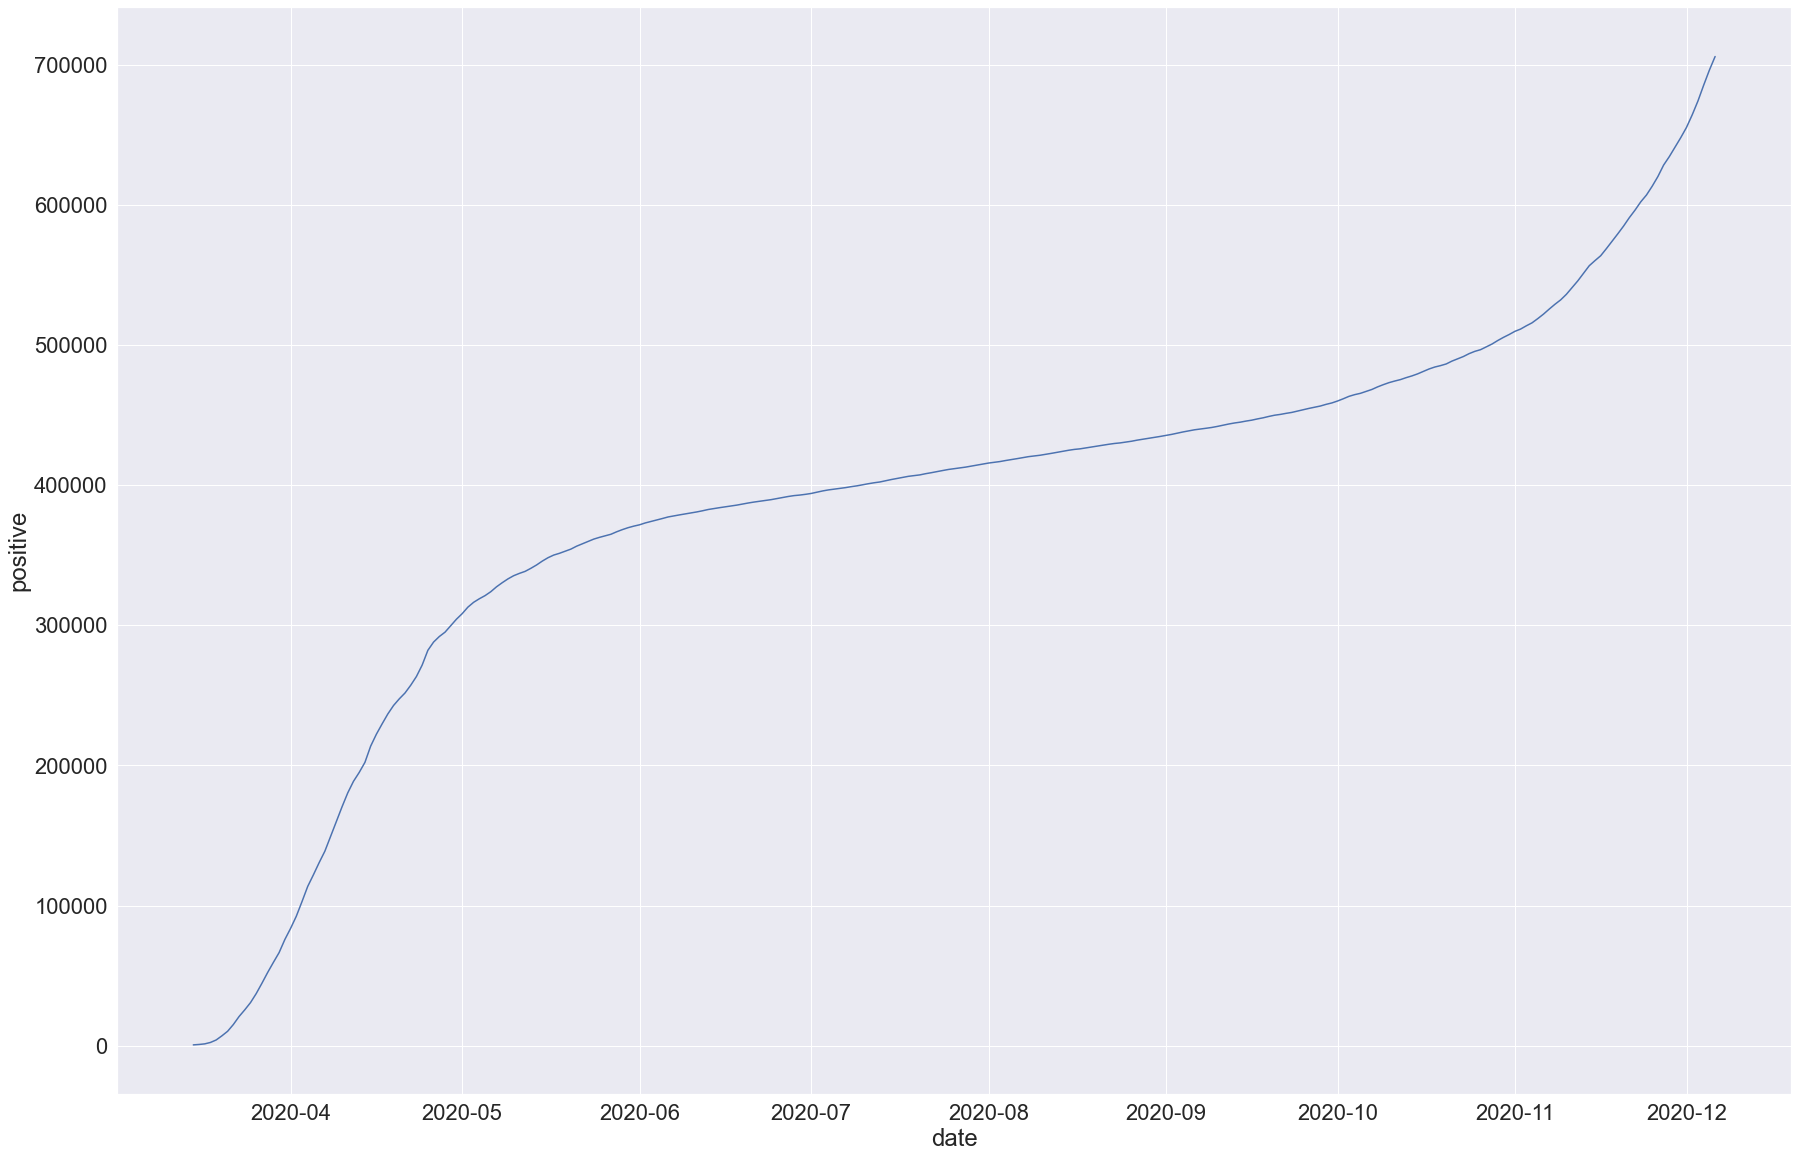

In [48]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=ny,x='date', y='positive')

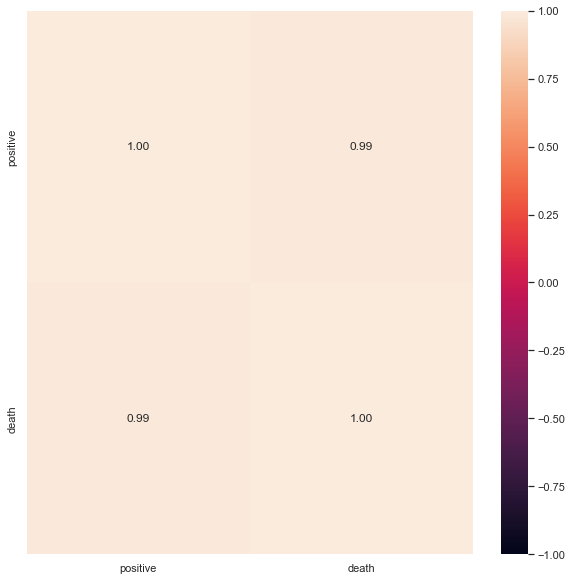

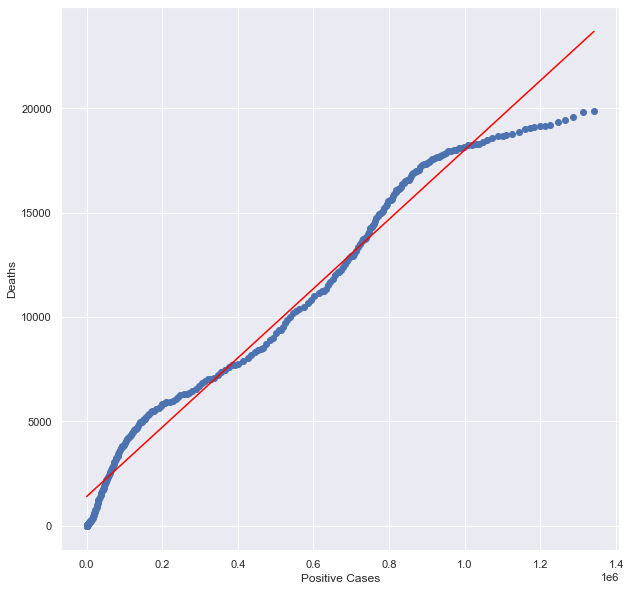

In [49]:
CA = bystates[bystates.state == 'CA']
cleaned = CA[CA.death >= 0]
CA = cleaned[cleaned.positive >= 0]
CAdeath = pd.DataFrame(CA['death'])
CApos = pd.DataFrame(CA['positive'])
combined = pd.concat([CApos, CAdeath], axis=1)
sb.set(rc={'figure.figsize':(10,10)},font_scale=1)
sb.heatmap(combined.corr(), vmin=-1, vmax=1, annot=True,fmt='.2f')
linreg.fit(CApos, CAdeath)
regline_x = CApos
regline_y = linreg.intercept_ + linreg.coef_ * CApos

f=plt.figure(figsize=(10,10))
plt.scatter(CApos, CAdeath)
plt.plot(regline_x, regline_y, color='red')
plt.xlabel('Positive Cases')
plt.ylabel('Deaths')
plt.show()

CAposanddate = pd.DataFrame(CA[['positive', 'date']])
CAdeathanddate = pd.DataFrame(CA[['death', 'date']])
CAposanddate['Growth Rate'] = CAposanddate['positive'].shift(1)/CAposanddate['positive']
CAdeathanddate['Growth Rate'] = CAdeathanddate['death'].shift(1)/CAdeathanddate['death']


<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

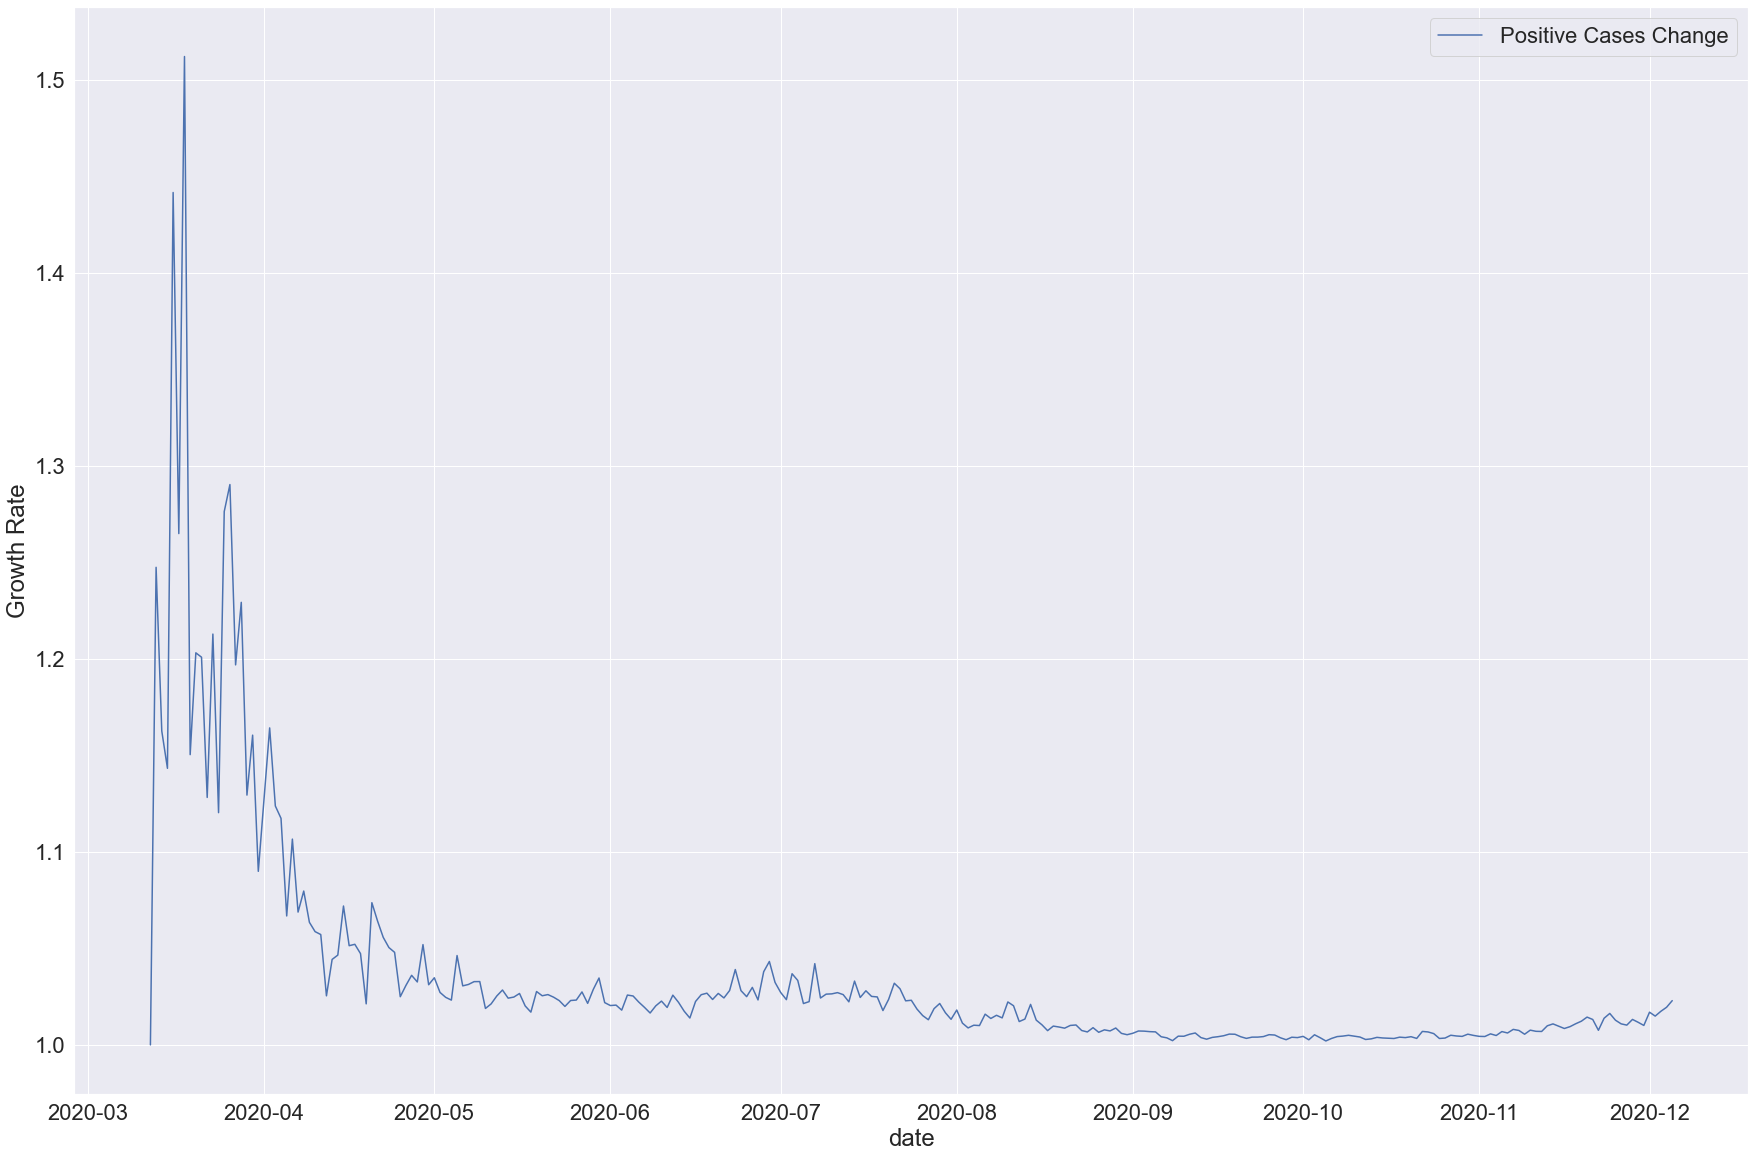

In [50]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(x='date', y='Growth Rate', data=CAposanddate, label='Positive Cases Change')

<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

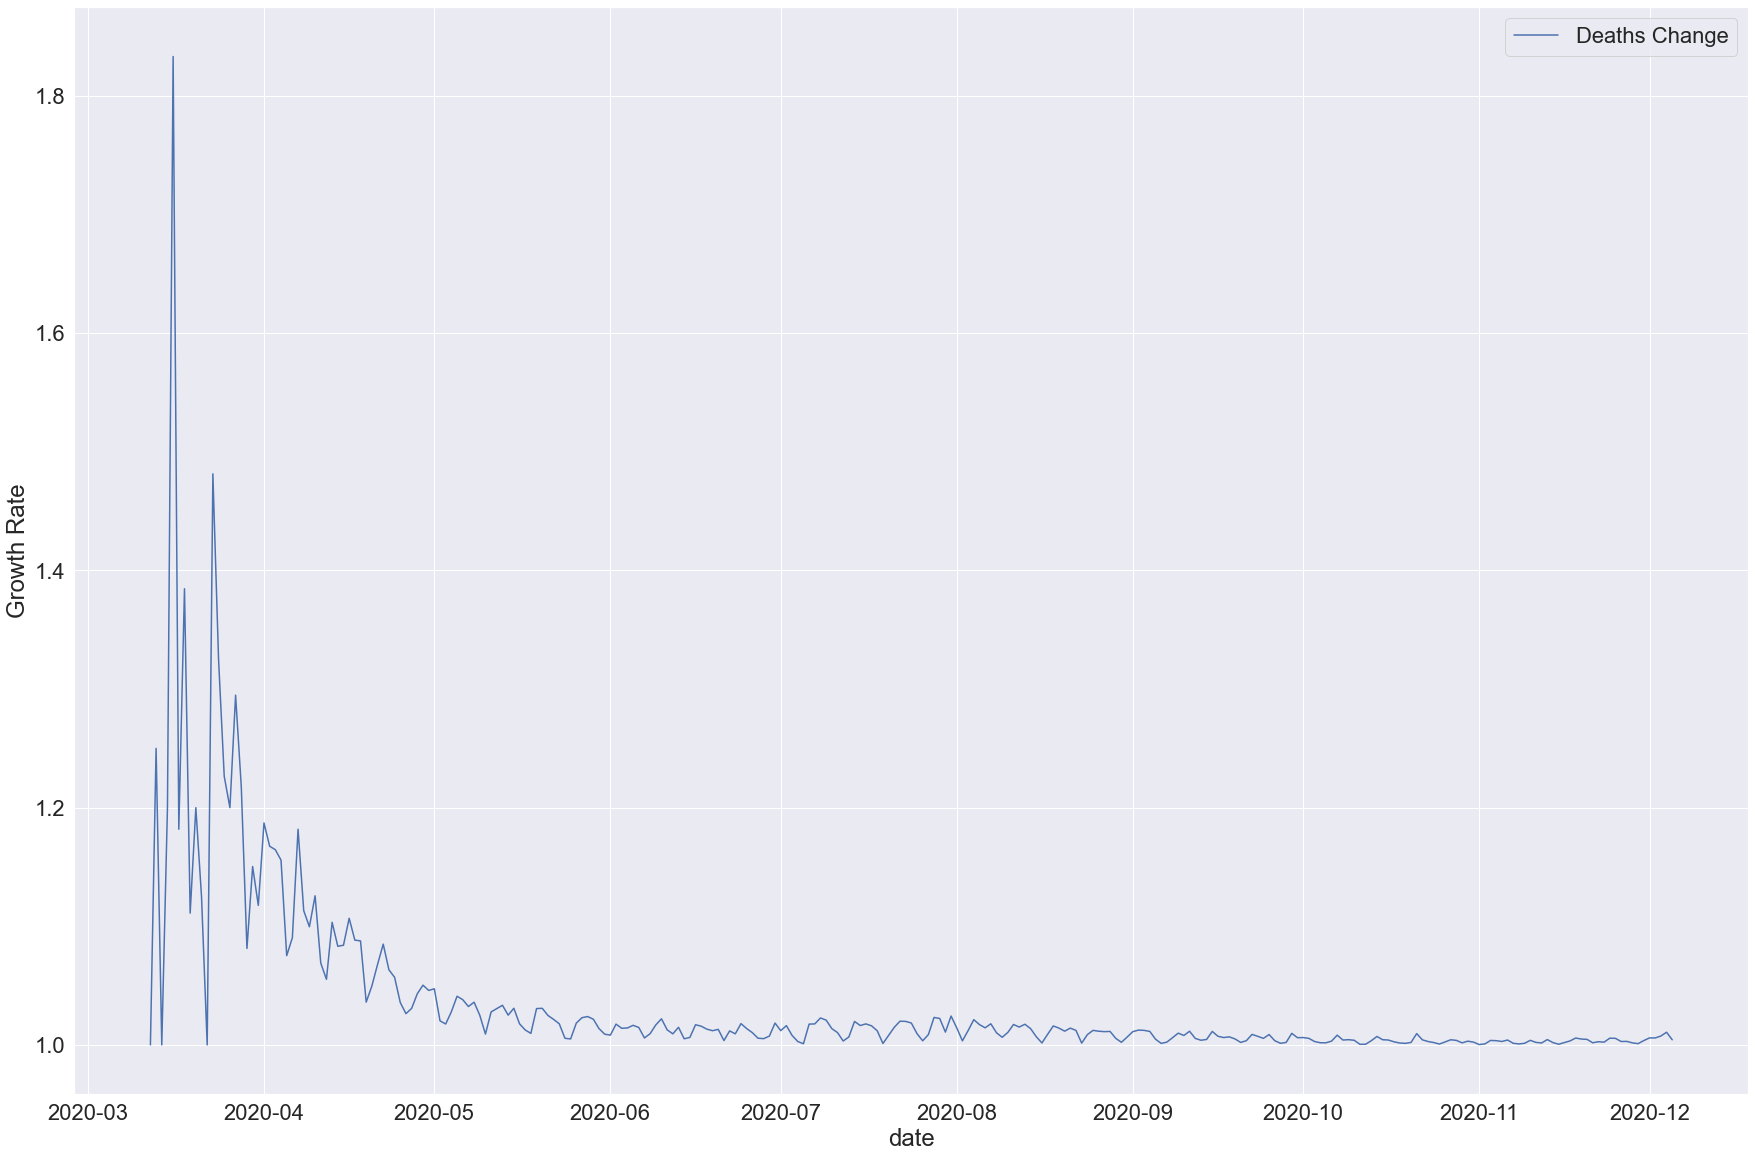

In [51]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(x='date', y='Growth Rate', data=CAdeathanddate, label='Deaths Change')

<AxesSubplot:xlabel='date', ylabel='death'>

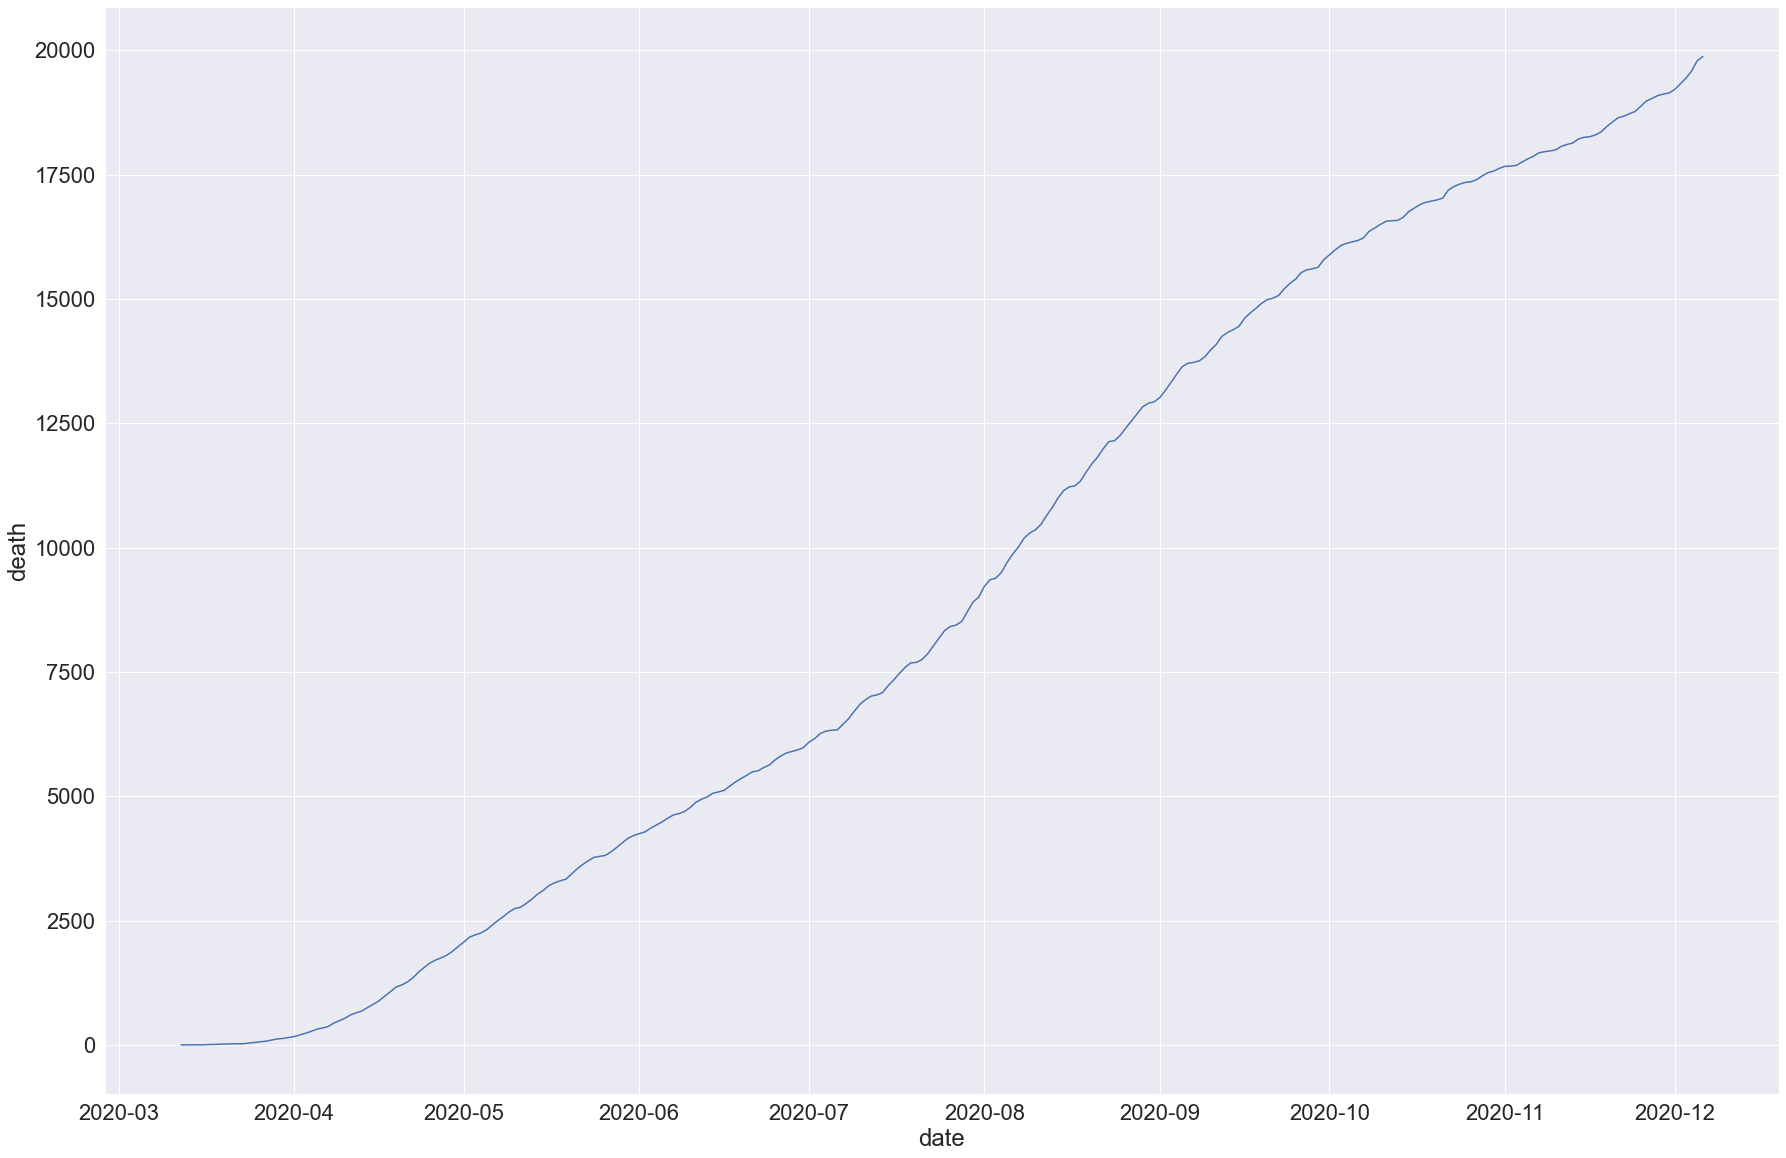

In [52]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=CA,x='date', y='death')

<AxesSubplot:xlabel='date', ylabel='positive'>

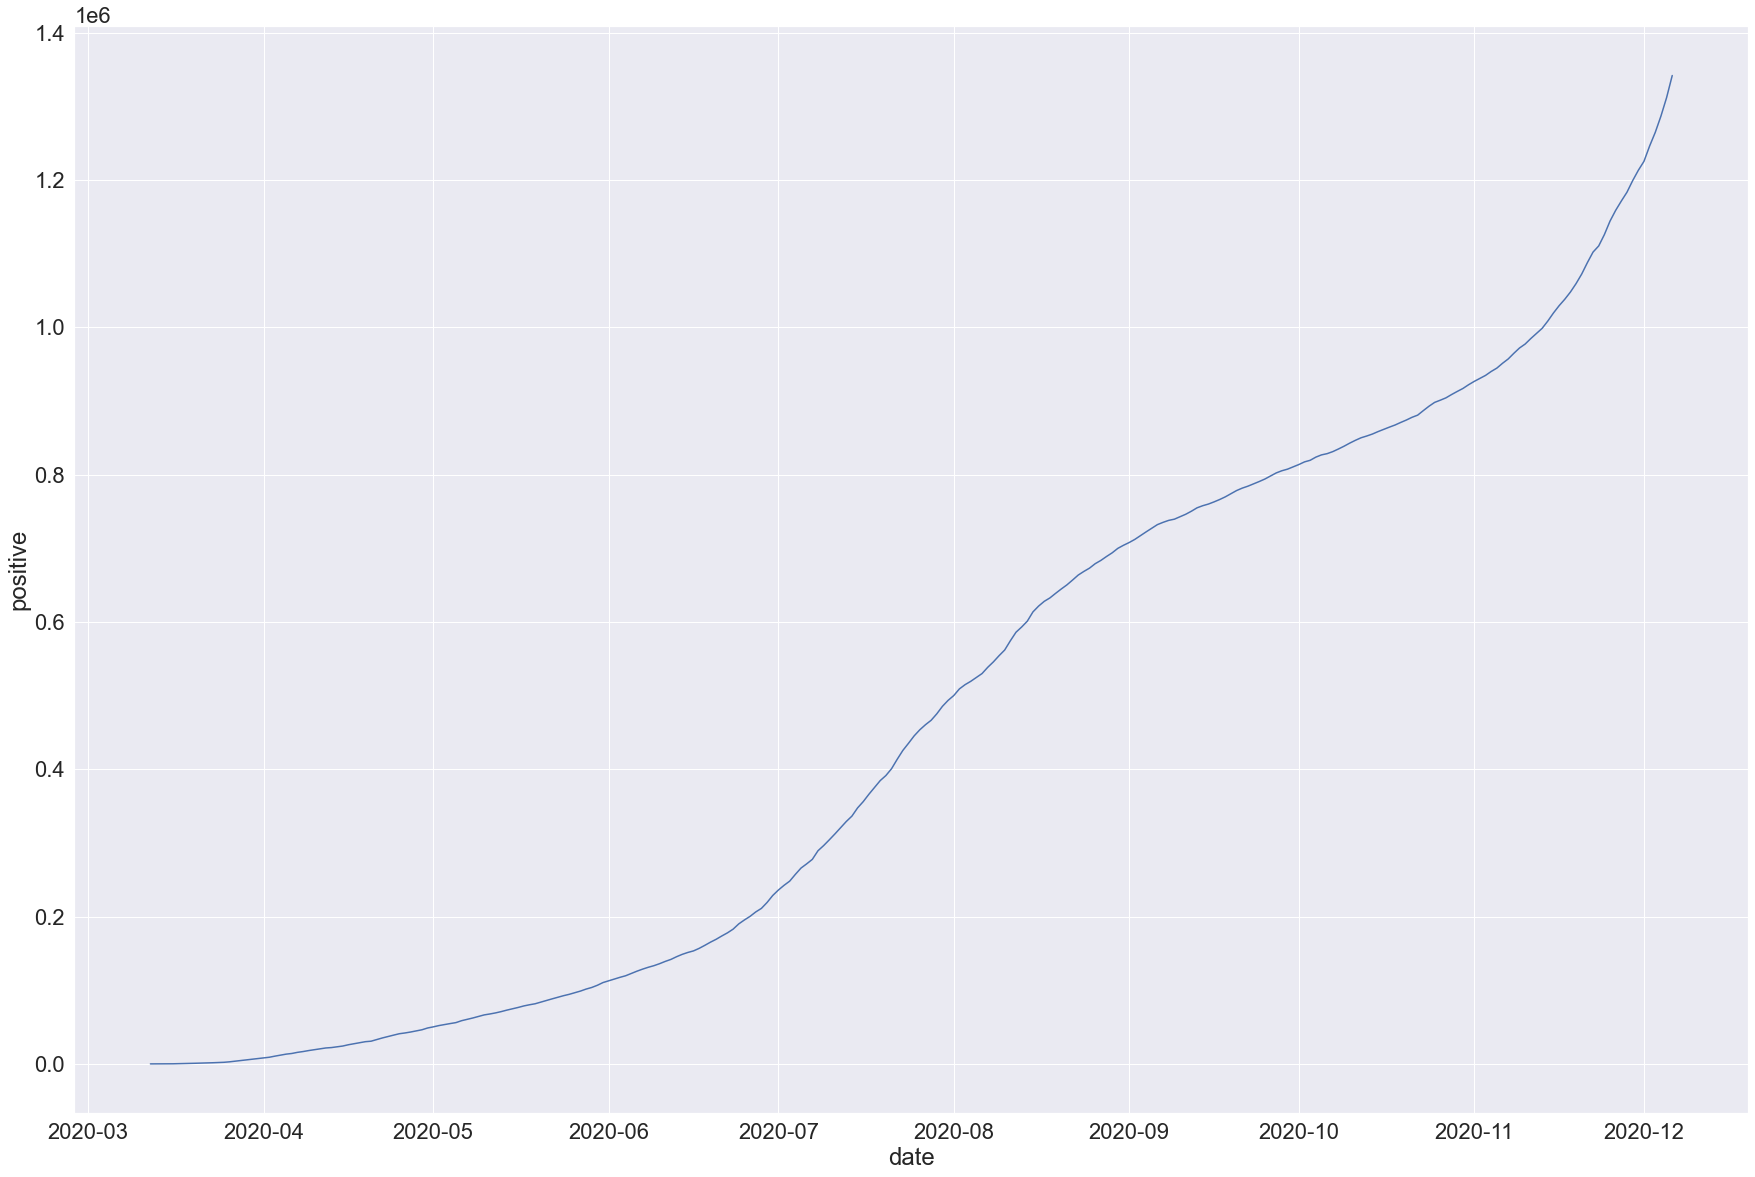

In [53]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=CA,x='date', y='positive')

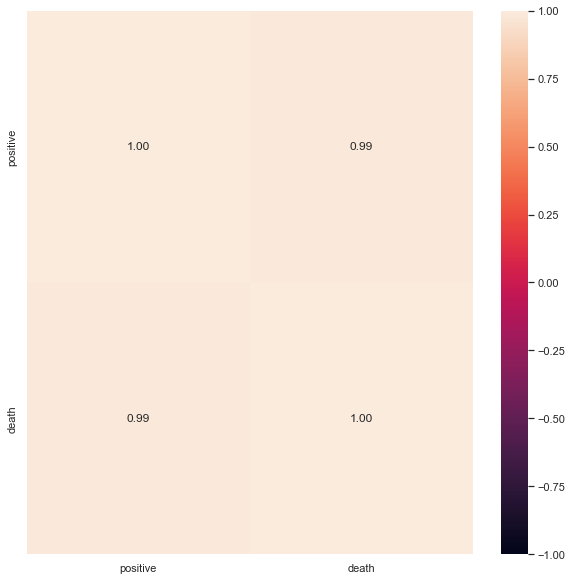

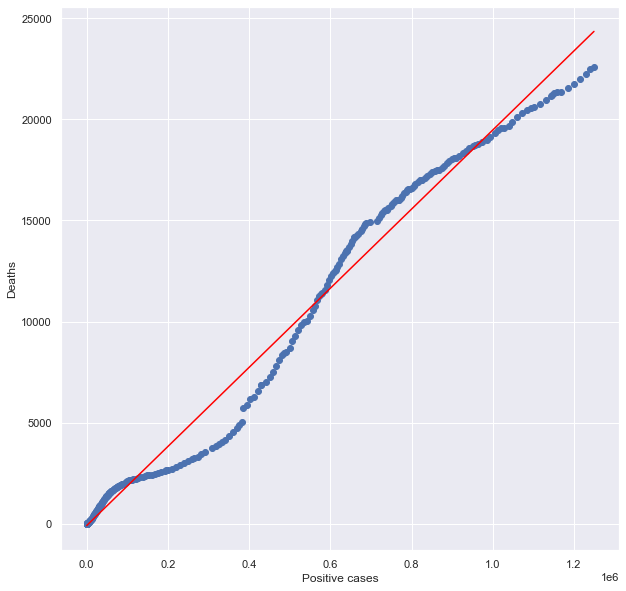

In [54]:
TX = bystates[bystates.state == 'TX']
cleaned = TX[TX.death >= 0]
TX = cleaned[cleaned.positive >= 0]
TXdeath = pd.DataFrame(TX['death'])
TXpos = pd.DataFrame(TX['positive'])
combined = pd.concat([TXpos, TXdeath], axis=1)
sb.set(rc={'figure.figsize':(10,10)},font_scale =1)
sb.heatmap(combined.corr(), vmin=-1, vmax=1, annot=True,fmt='.2f')
linreg.fit(TXpos, TXdeath)
regline_x = TXpos
regline_y = linreg.intercept_ + linreg.coef_ * TXpos

f=plt.figure(figsize=(10,10))
plt.scatter(TXpos, TXdeath)
plt.plot(regline_x, regline_y, color='red')
plt.xlabel('Positive cases')
plt.ylabel('Deaths')
plt.show()

TXposanddate = pd.DataFrame(TX[['positive', 'date']])
TXdeathanddate = pd.DataFrame(TX[['death', 'date']])
TXposanddate['Growth Rate'] = TXposanddate['positive'].shift(1)/TXposanddate['positive']
TXdeathanddate['Growth Rate'] = TXdeathanddate['death'].shift(1)/TXdeathanddate['death']

<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

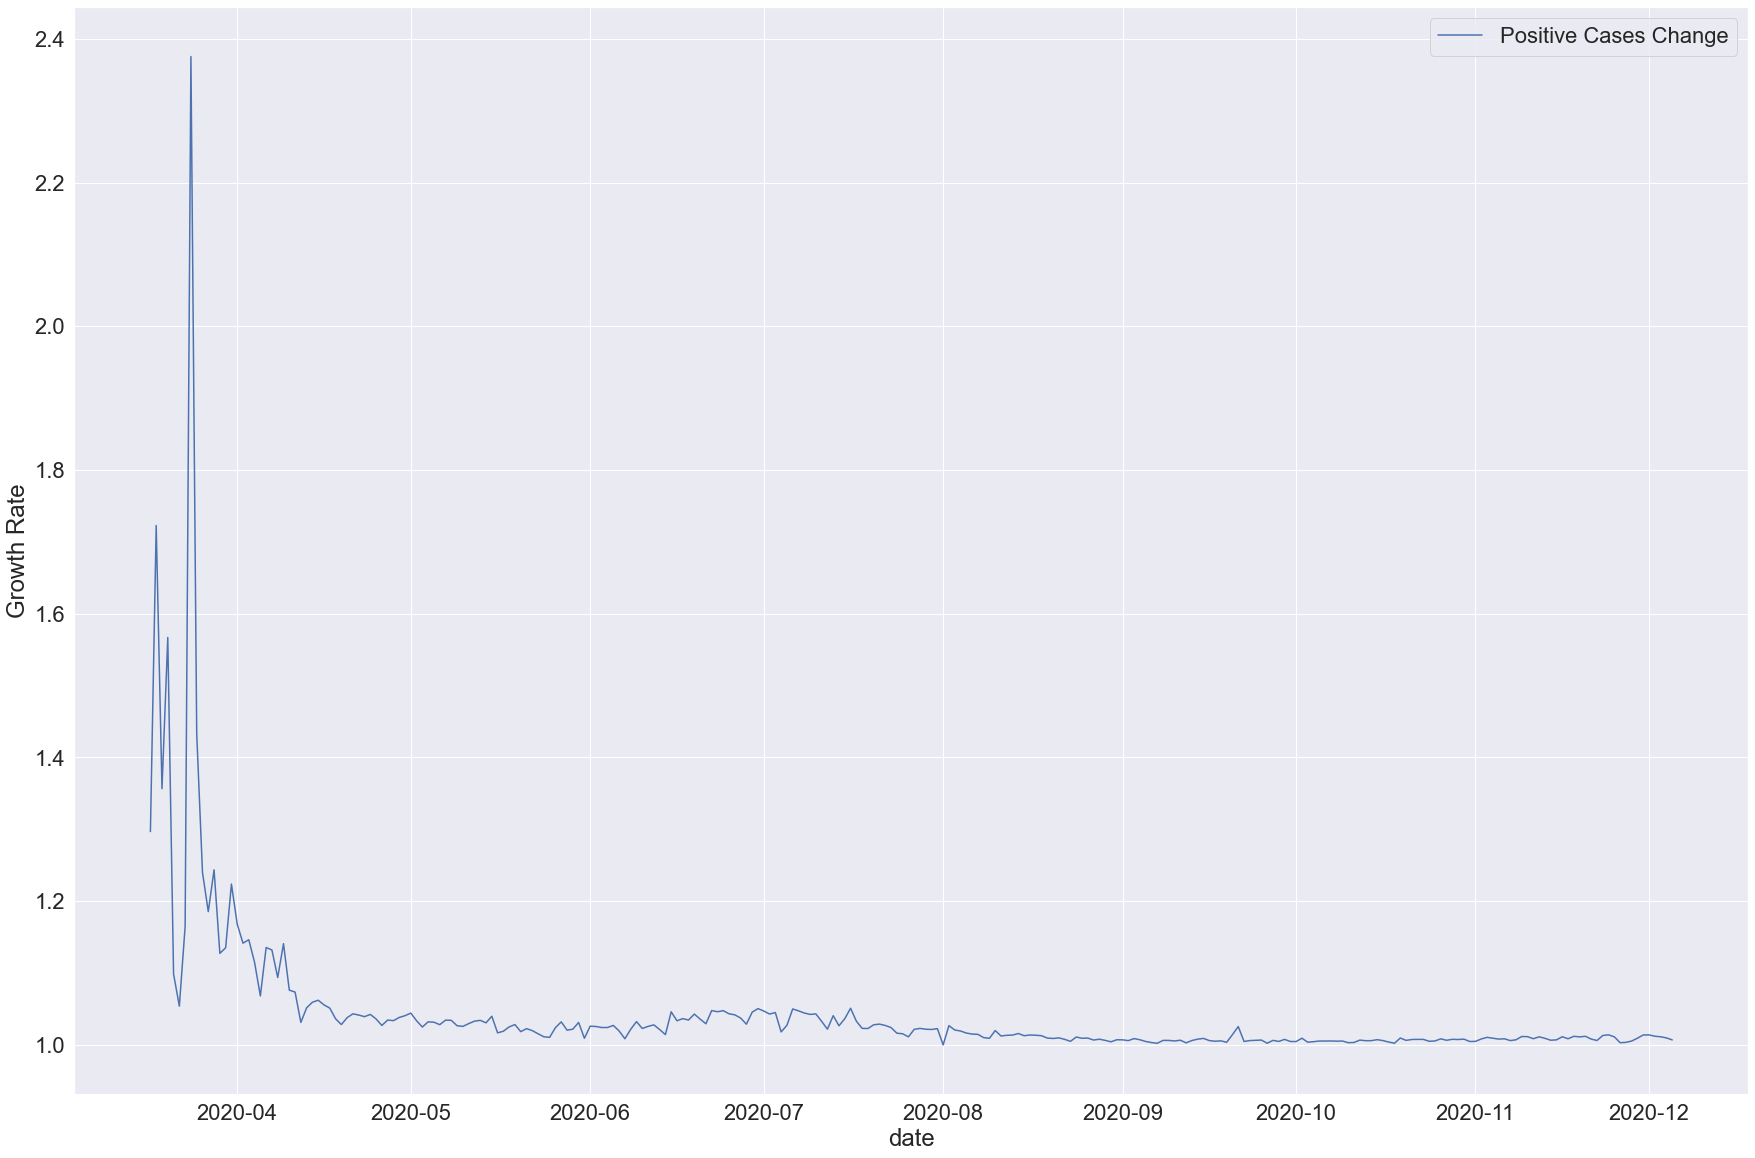

In [55]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
#TXposanddate = TXposanddate[TXposanddate.date >= '2020-04-01']
sb.lineplot(x='date', y='Growth Rate', data=TXposanddate, label='Positive Cases Change')

<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

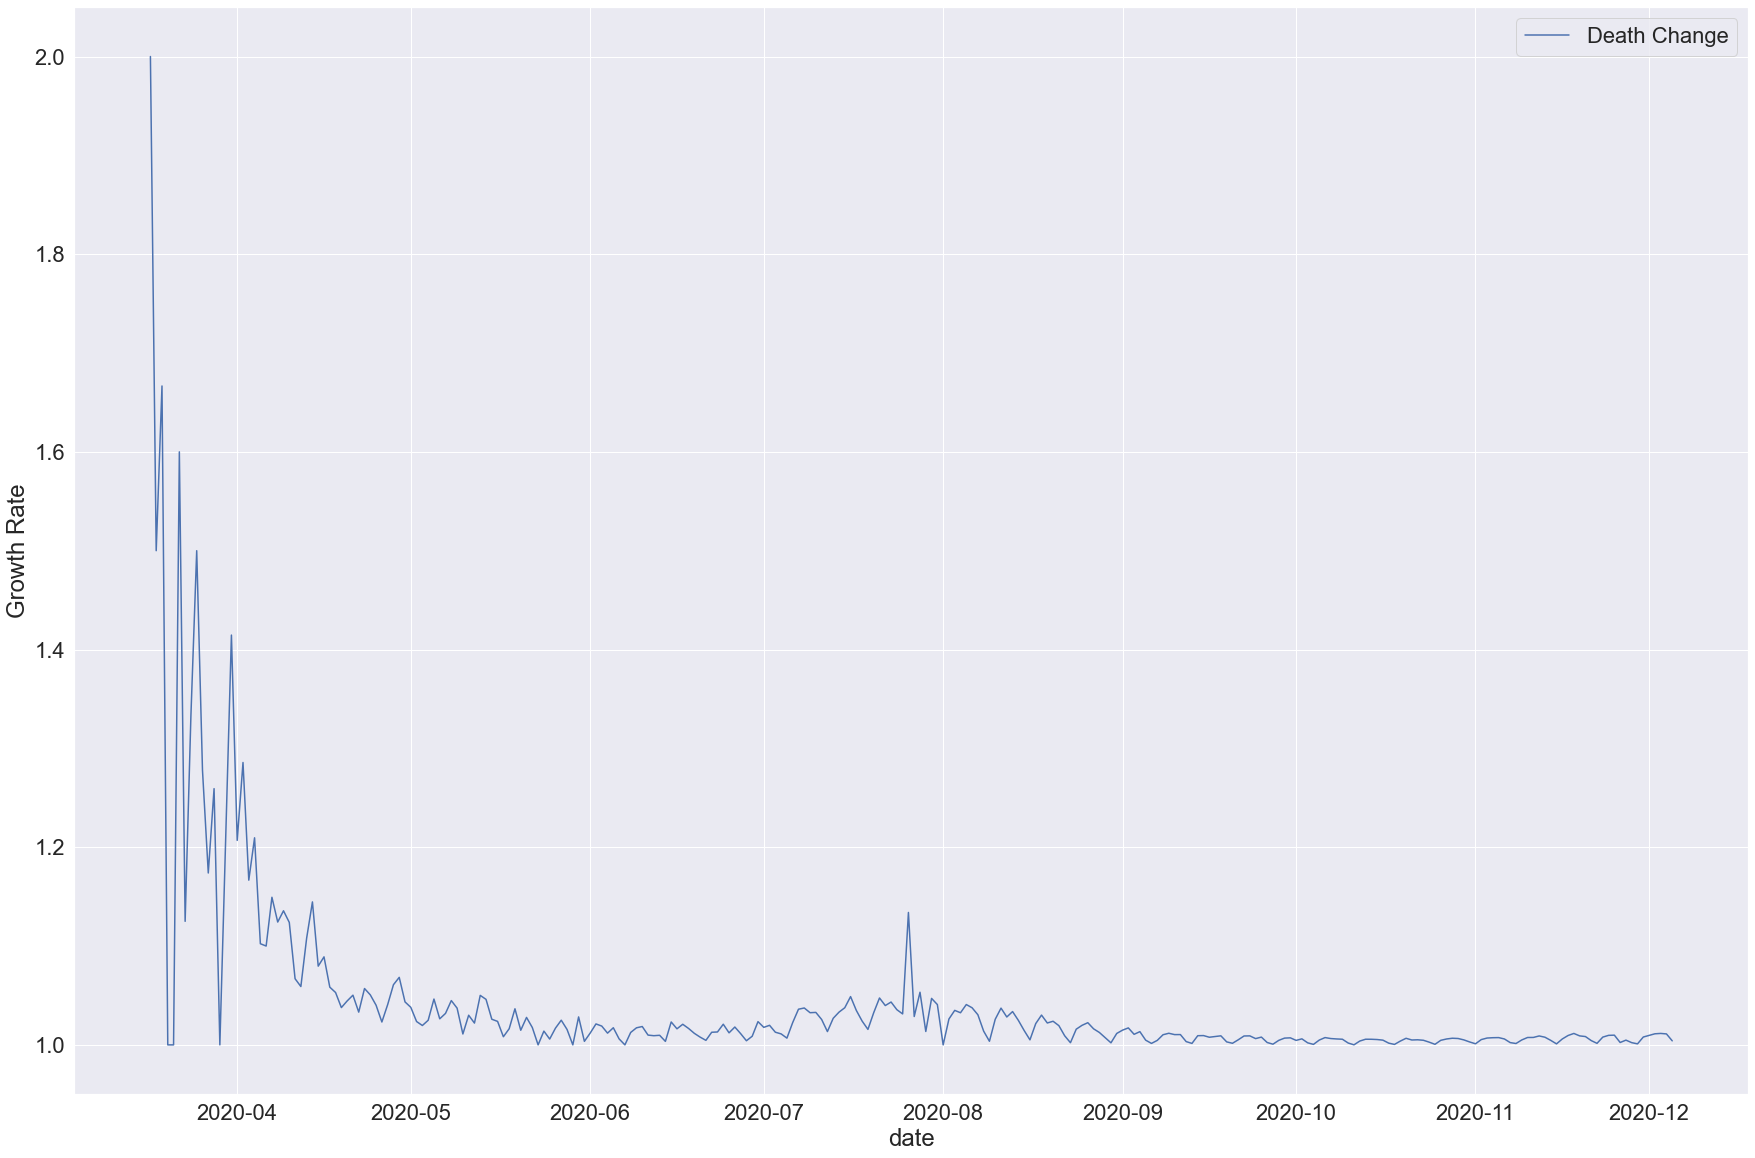

In [56]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
#keep april onwards

sb.lineplot(x='date', y='Growth Rate', data=TXdeathanddate, label='Death Change')

<AxesSubplot:xlabel='date', ylabel='death'>

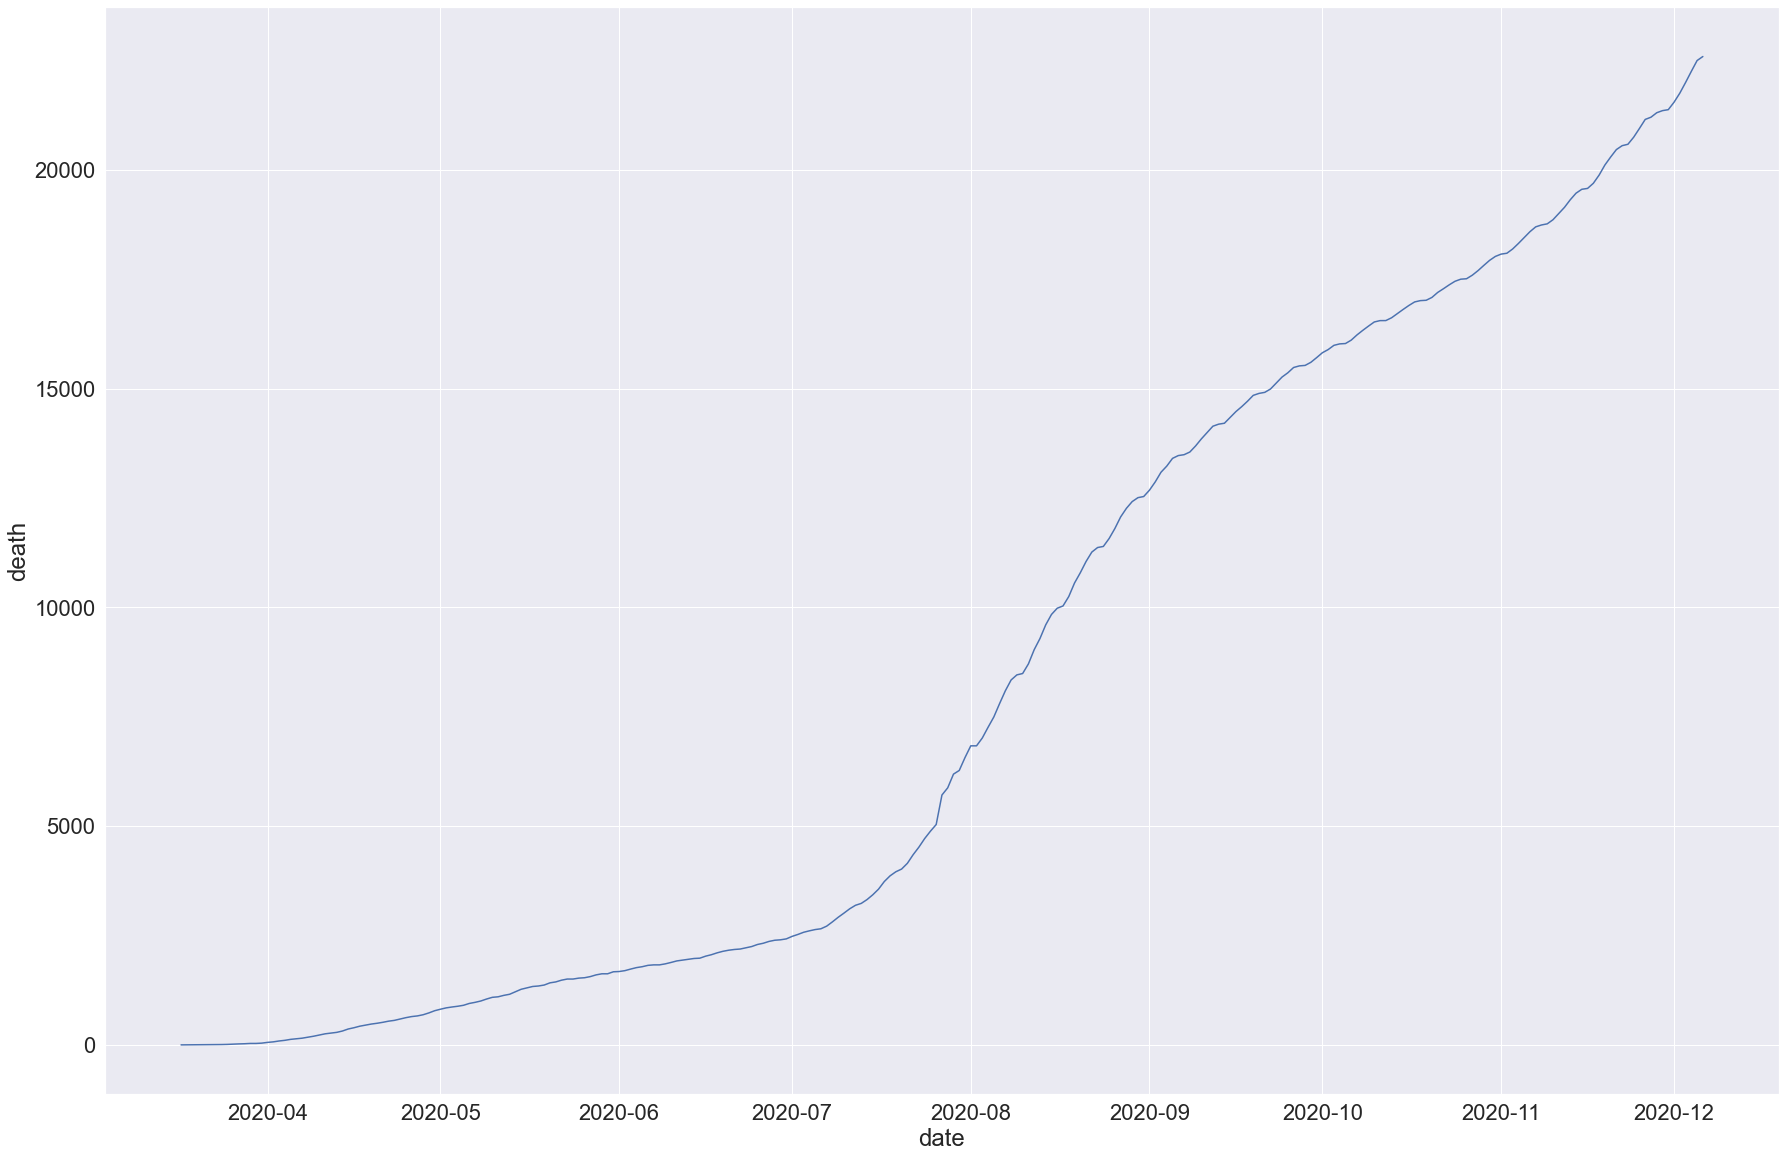

In [57]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=TX,x='date', y='death')

<AxesSubplot:xlabel='date', ylabel='positive'>

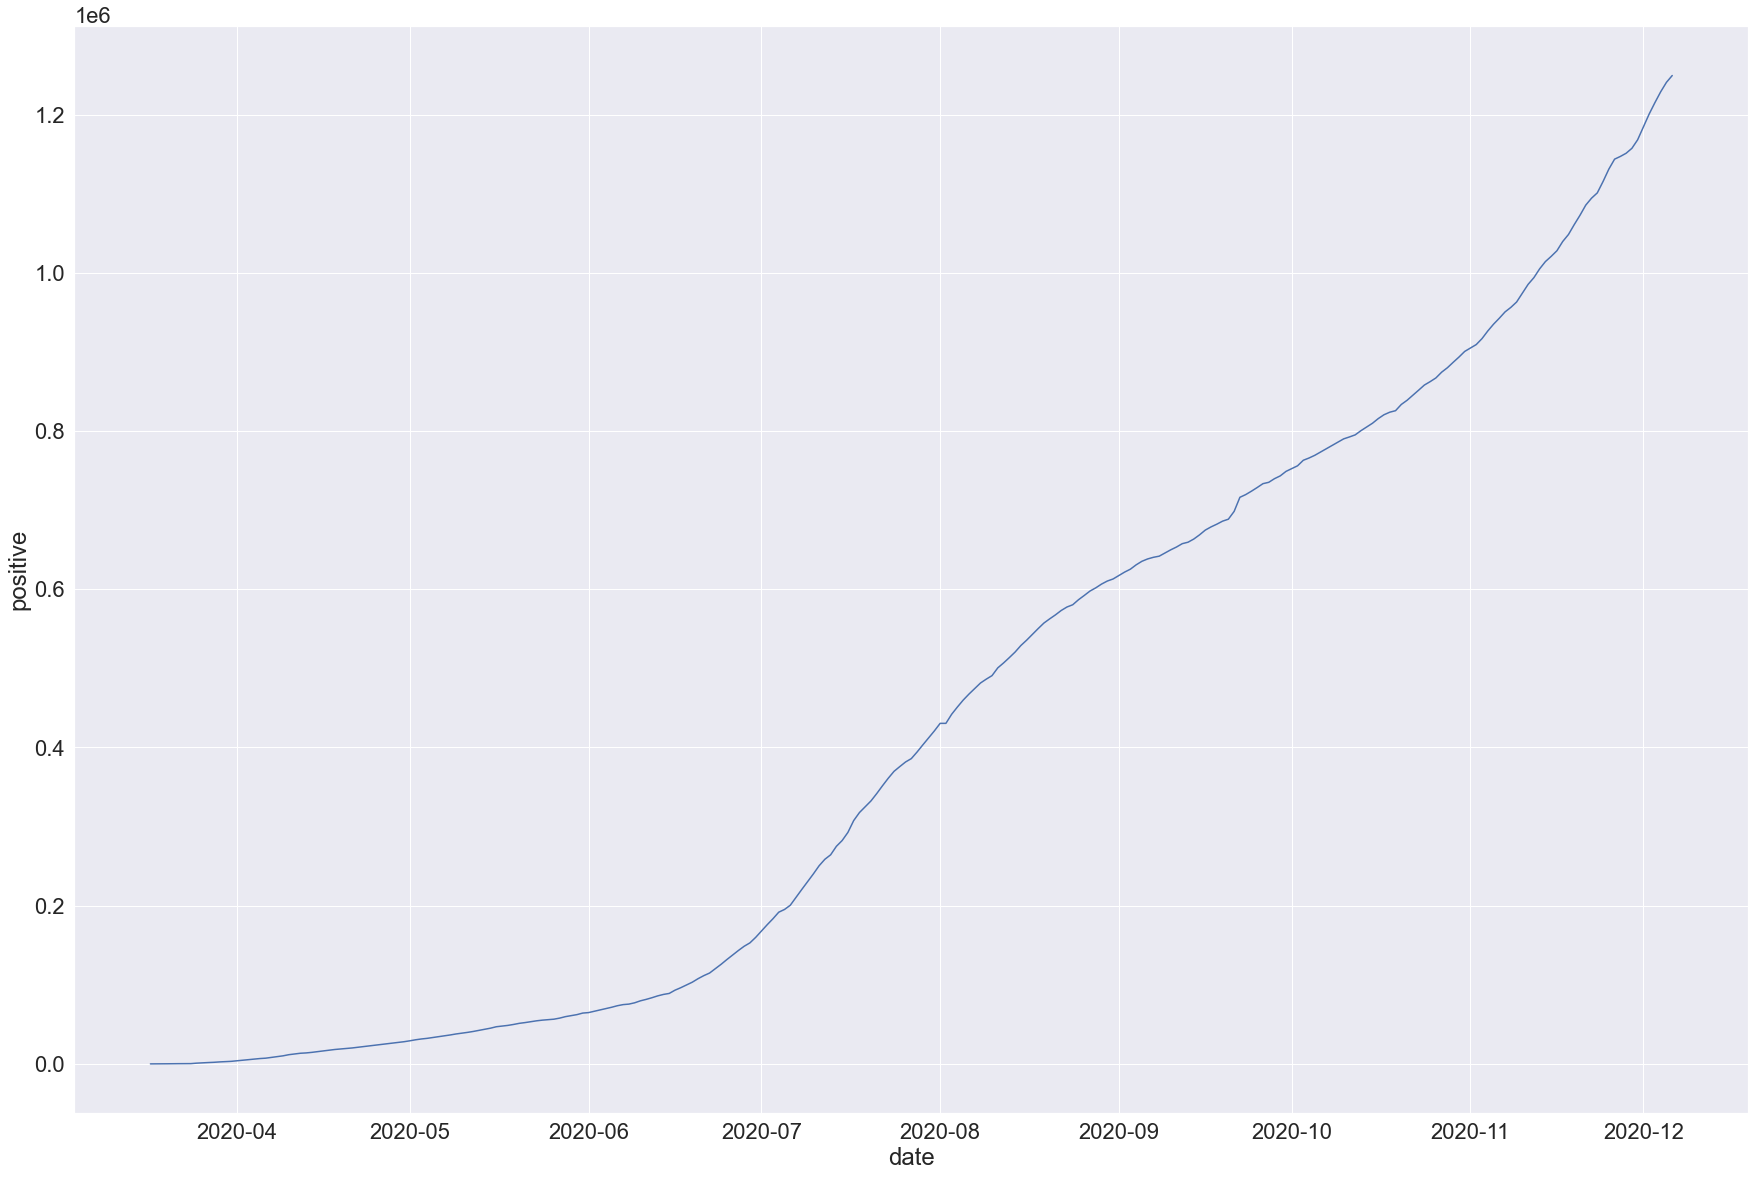

In [58]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=TX,x='date', y='positive')

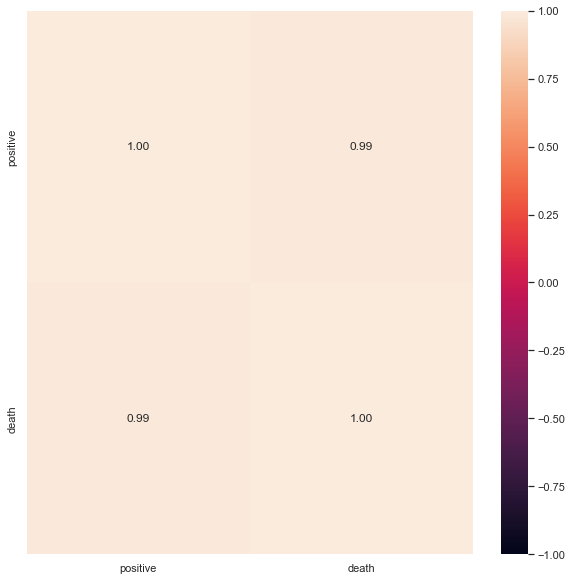

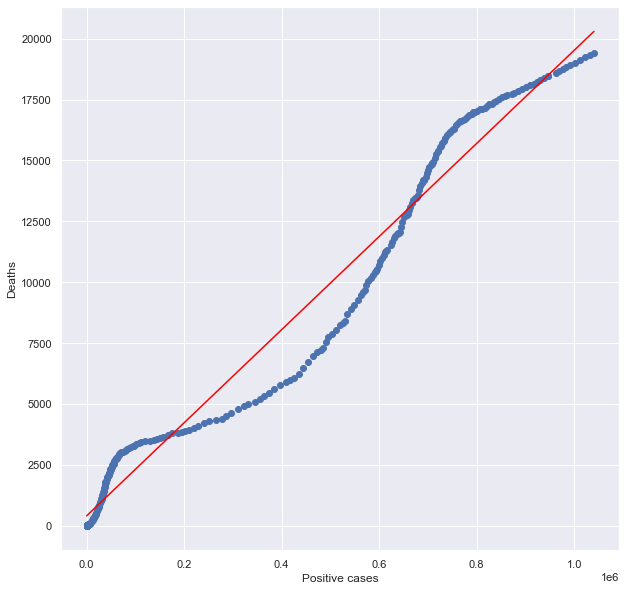

In [59]:
FL = bystates[bystates.state == 'FL']
cleaned = FL[FL.death >= 0]
FL = cleaned[cleaned.positive >= 0]
FLdeath = pd.DataFrame(FL['death'])
FLpos = pd.DataFrame(FL['positive'])
combined = pd.concat([FLpos, FLdeath], axis=1)
sb.set(rc={'figure.figsize':(10,10)},font_scale = 1)
sb.heatmap(combined.corr(), vmin=-1, vmax=1, annot=True,fmt='.2f')
linreg.fit(FLpos, FLdeath)
regline_x = FLpos
regline_y = linreg.intercept_ + linreg.coef_ * FLpos

f=plt.figure(figsize=(10,10))
plt.scatter(FLpos, FLdeath)
plt.plot(regline_x, regline_y, color='red')
plt.xlabel('Positive cases')
plt.ylabel('Deaths')
plt.show()

FLposanddate = pd.DataFrame(FL[['positive', 'date']])
FLdeathanddate = pd.DataFrame(FL[['death', 'date']])
FLposanddate['Growth Rate'] = FLposanddate['positive'].shift(1)/FLposanddate['positive']
FLdeathanddate['Growth Rate'] = FLdeathanddate['death'].shift(1)/FLdeathanddate['death']

<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

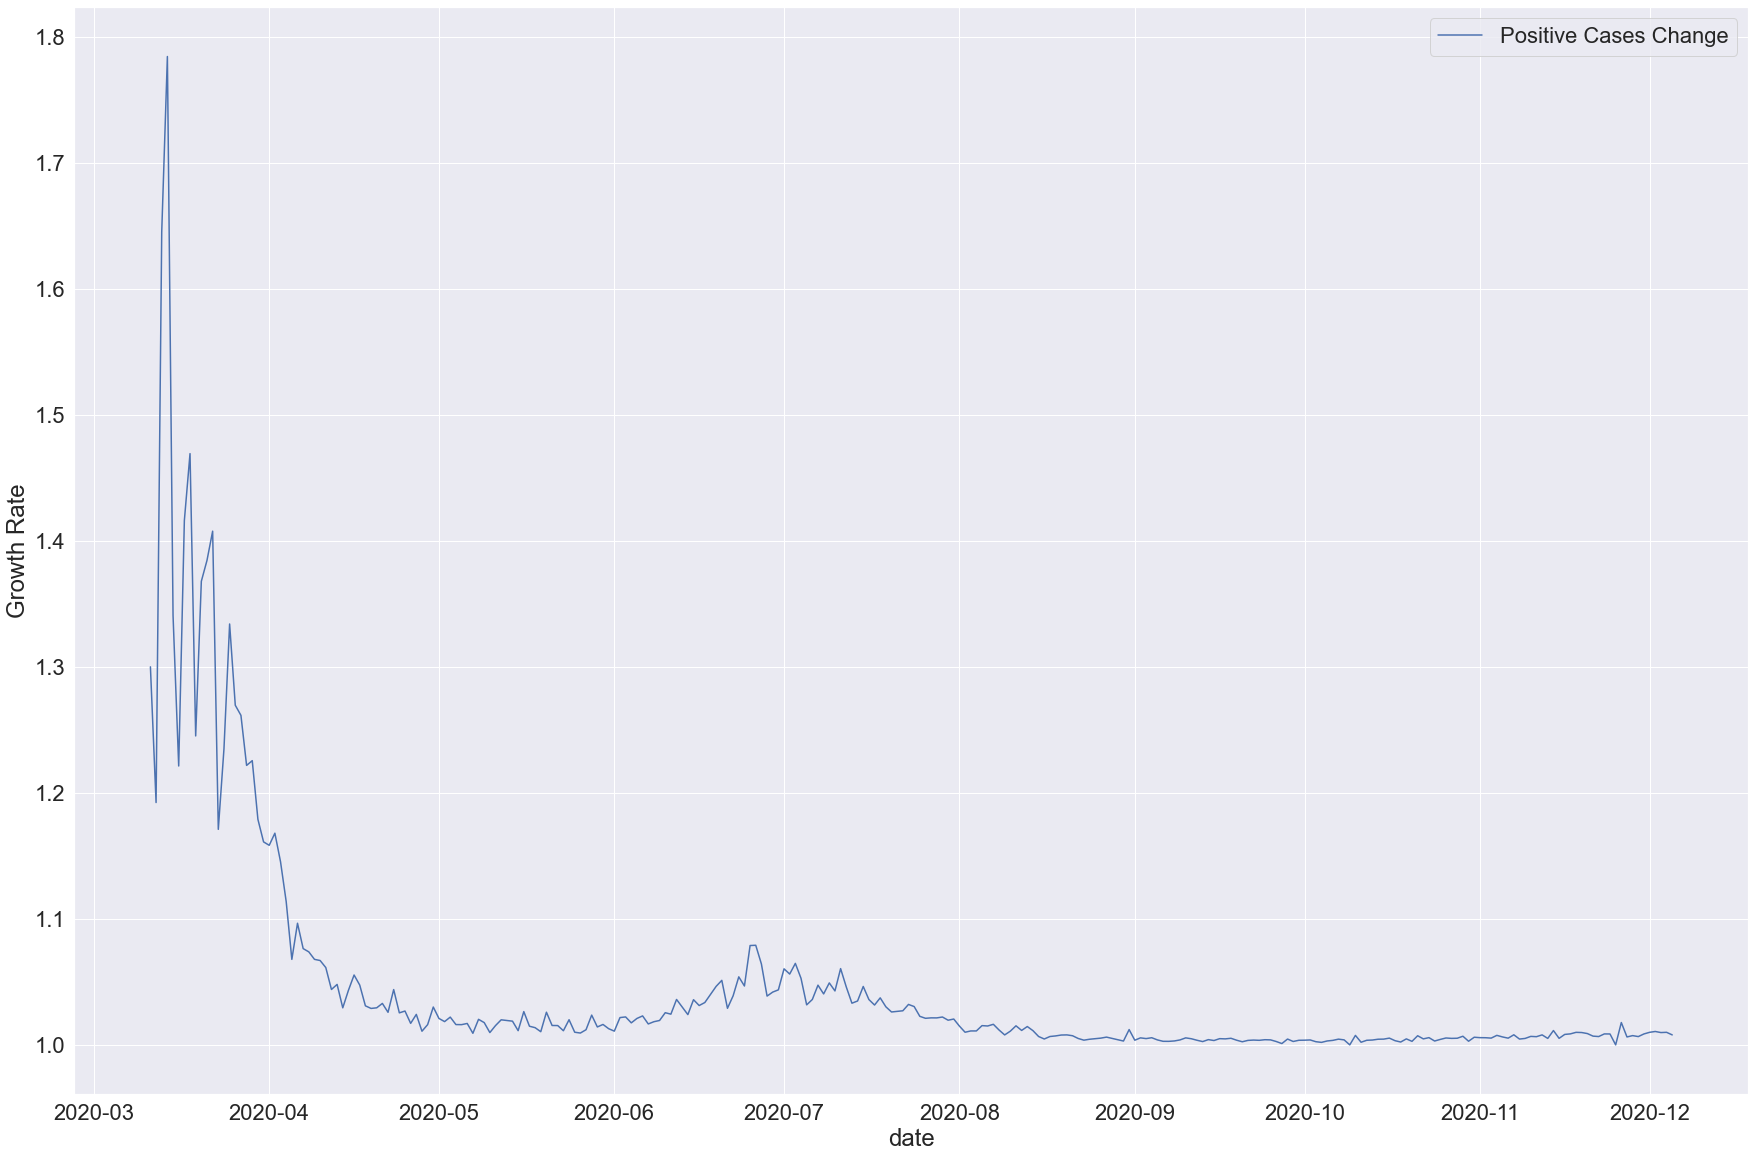

In [60]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(x='date', y='Growth Rate', data=FLposanddate, label='Positive Cases Change')

<AxesSubplot:xlabel='date', ylabel='Growth Rate'>

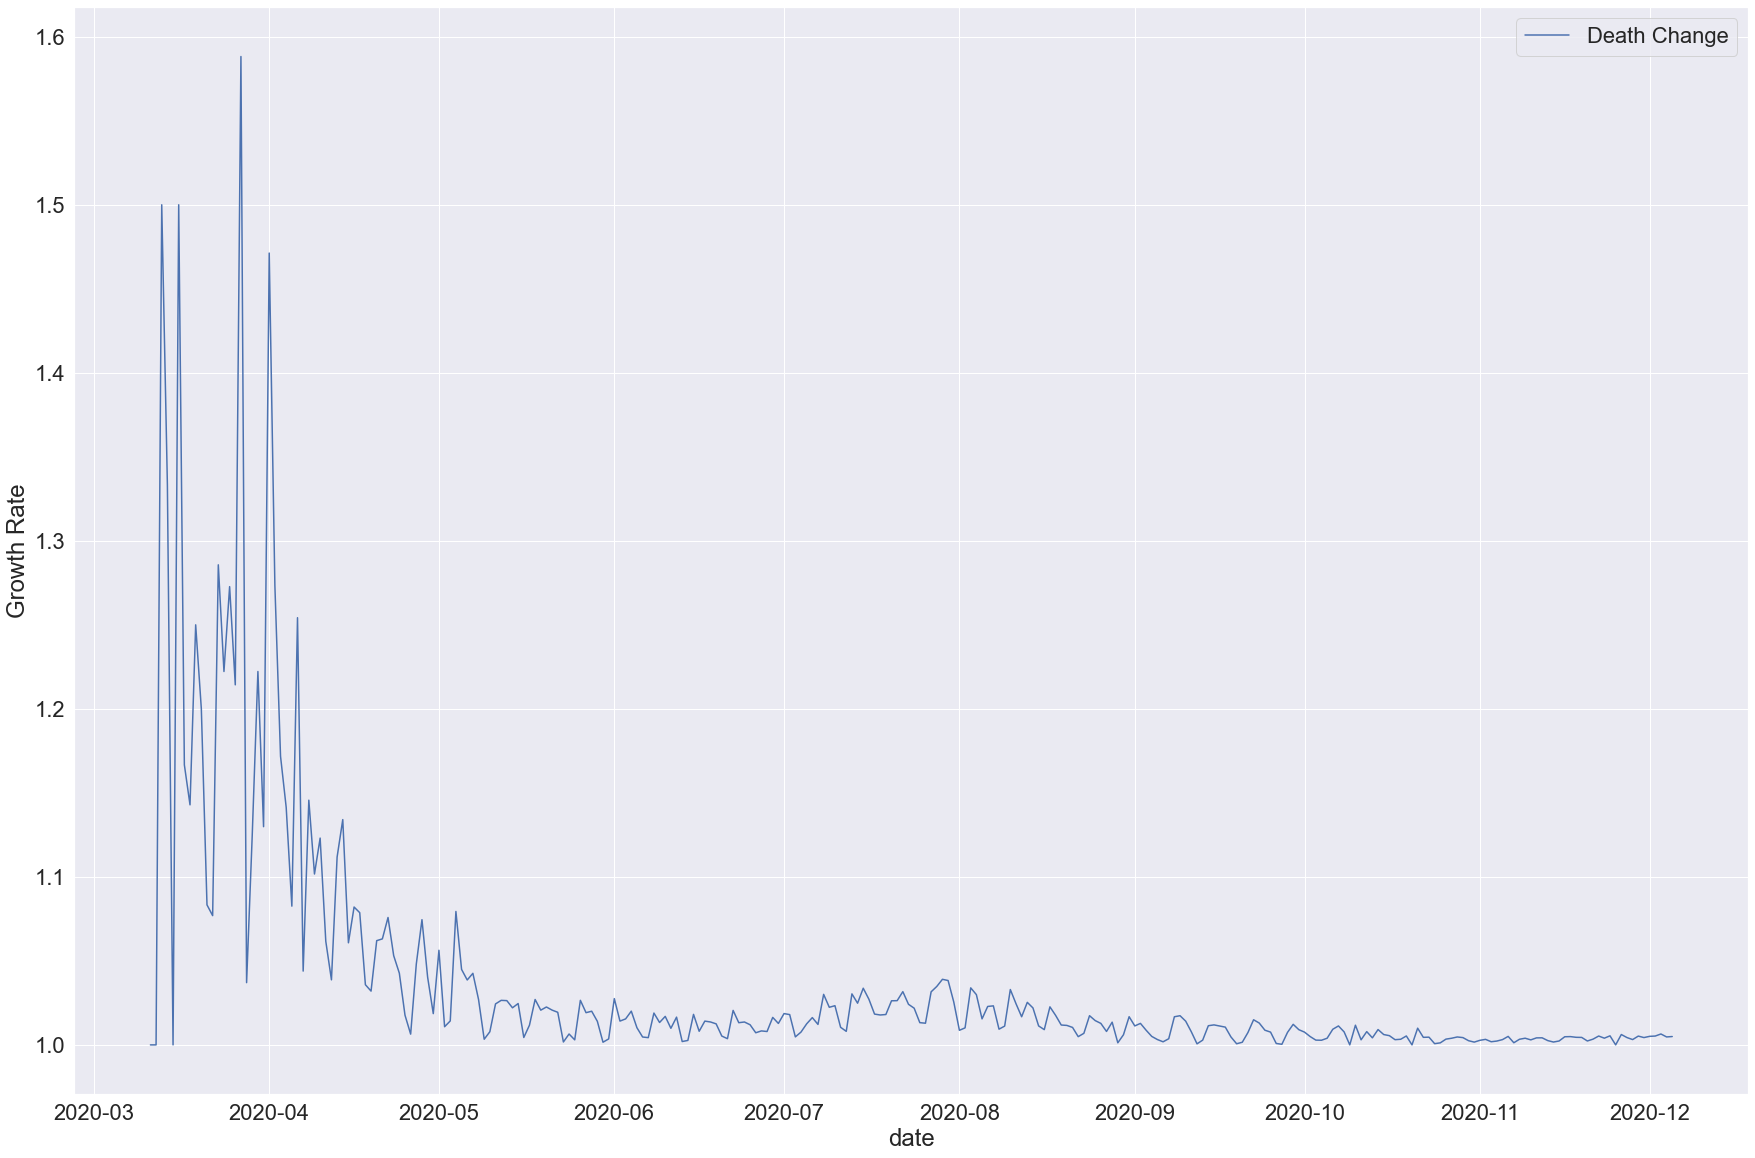

In [61]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(x='date', y='Growth Rate', data=FLdeathanddate, label='Death Change')

<AxesSubplot:xlabel='date', ylabel='death'>

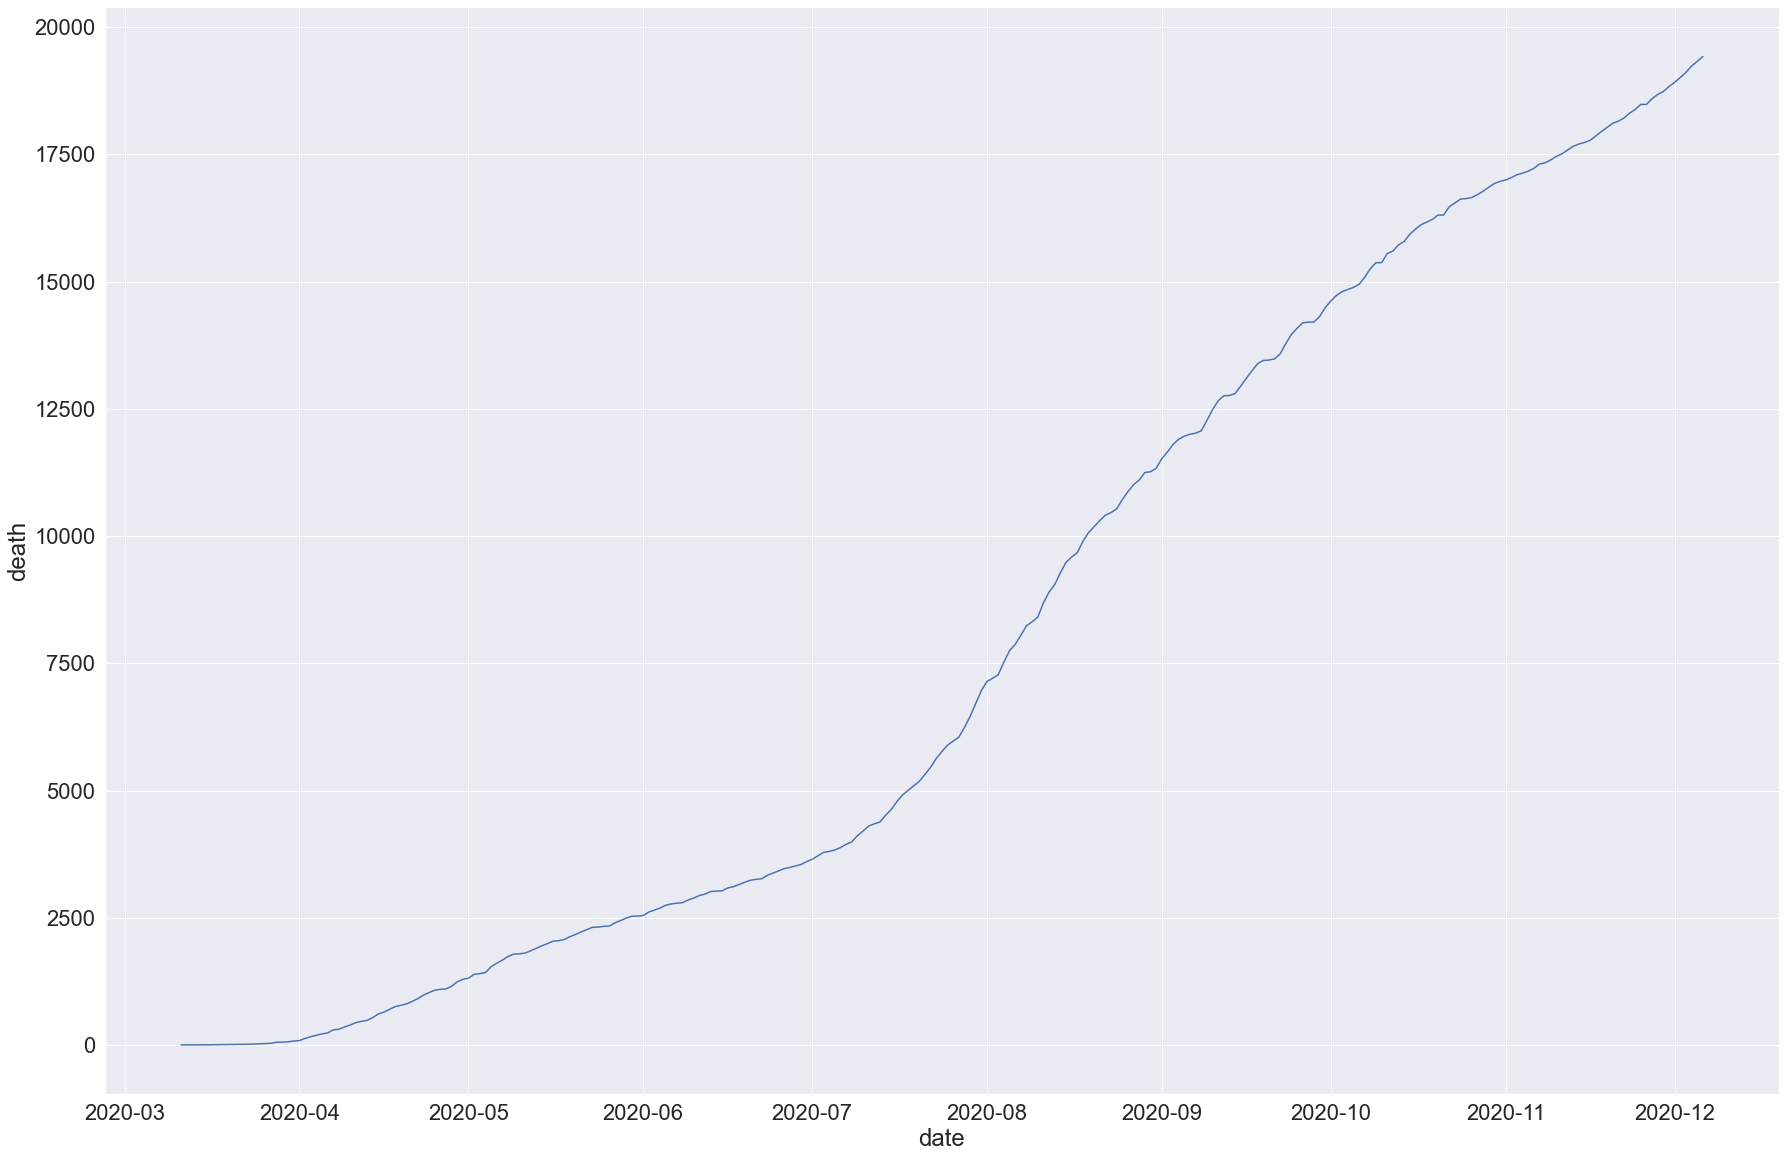

In [62]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=FL,x='date', y='death')

<AxesSubplot:xlabel='date', ylabel='positive'>

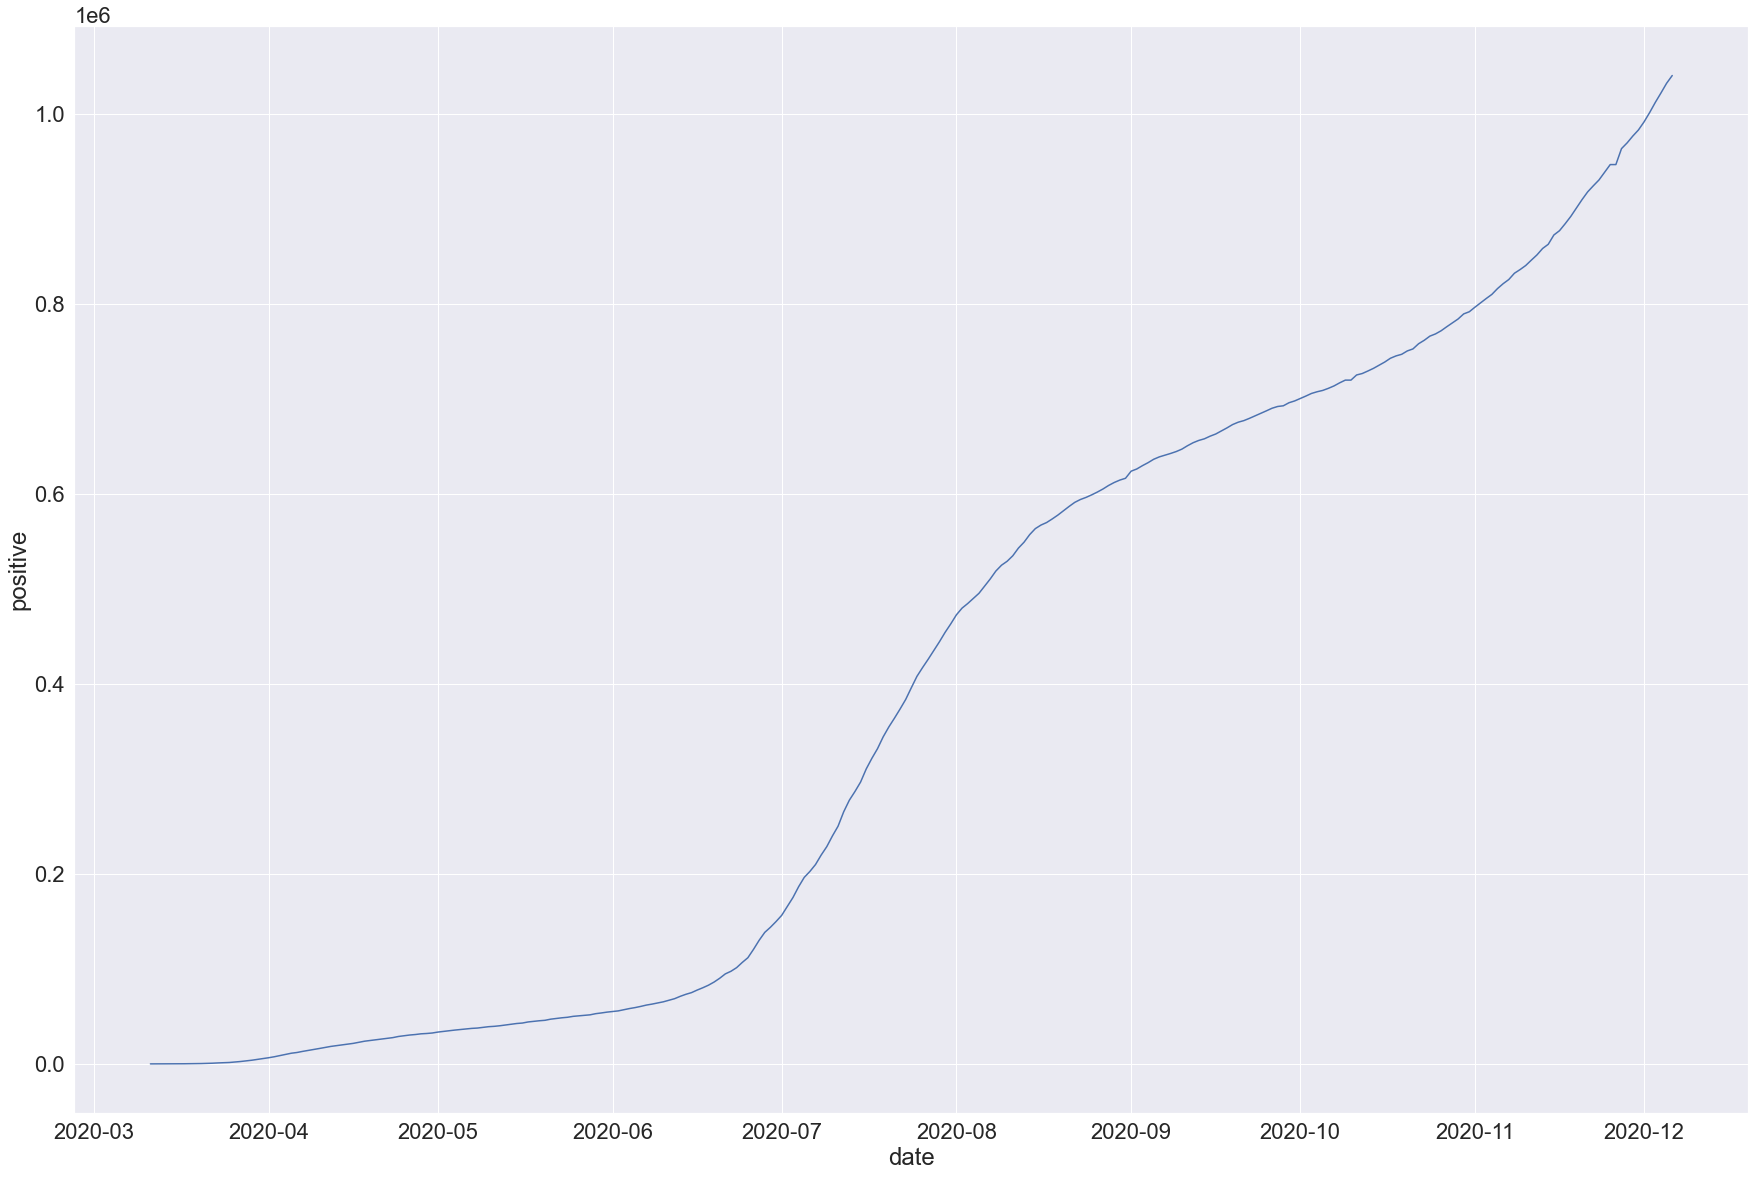

In [63]:
sb.set(rc={'figure.figsize':(30,20)},font_scale = 2)
sb.lineplot(data=FL,x='date', y='positive')